## EXP_2467_seq_prune_08_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [2 3 8 9]
2
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 2s - loss: 0.0880 - accuracy: 0.9675 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0440 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0535 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0478 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0581 - val_accuracy: 0.9913


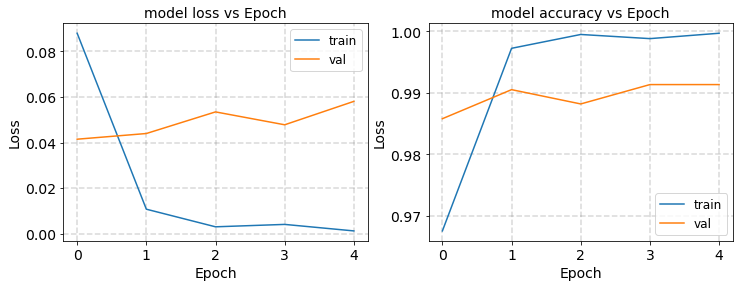

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1439 - accuracy: 0.9577 - val_loss: 0.0920 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 2s - loss: 0.0306 - accuracy: 0.9914 - val_loss: 0.0863 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 2s - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.0858 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1027 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 2.6966e-04 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9819


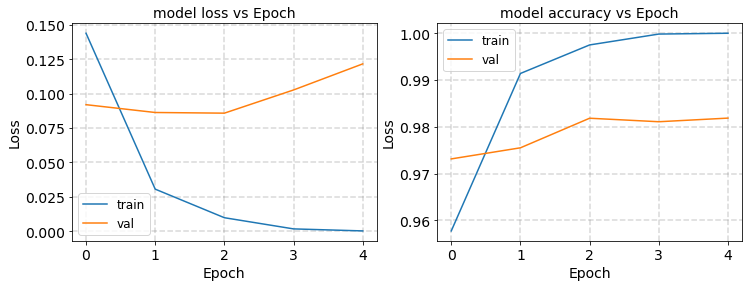

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1129 - accuracy: 0.9697 - val_loss: 0.0598 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 2s - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0586 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0730 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 2s - loss: 7.6058e-04 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 2s - loss: 1.9816e-04 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9794


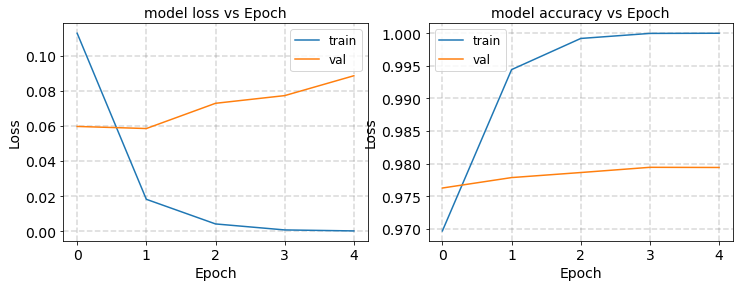

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0852 - accuracy: 0.9825 - val_loss: 0.0573 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.0595 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0698 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 8.0680e-04 - accuracy: 0.9999 - val_loss: 0.0806 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 1.7258e-04 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9890


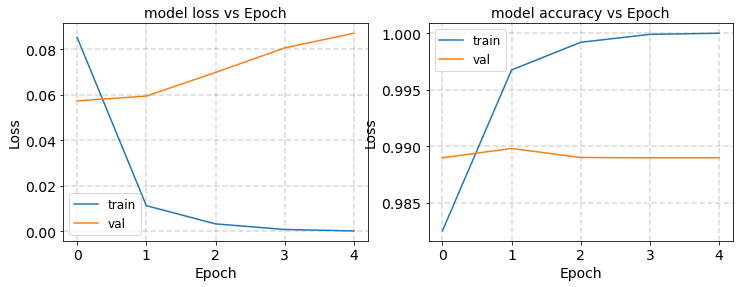

round1 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.1055 - accuracy: 0.9830 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0563 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 8.5531e-04 - accuracy: 0.9999 - val_loss: 0.0748 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 1.4829e-04 - accuracy: 1.0000 - val_loss: 0.0858 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 5.0704e-05 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9866


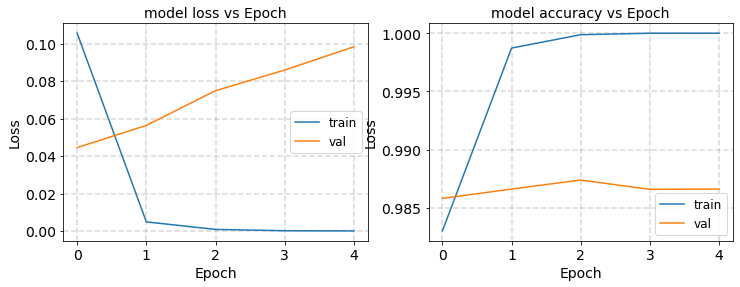

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1186 - accuracy: 0.9739 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0546 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0770 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 2s - loss: 4.1353e-04 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 1.1145e-04 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9858


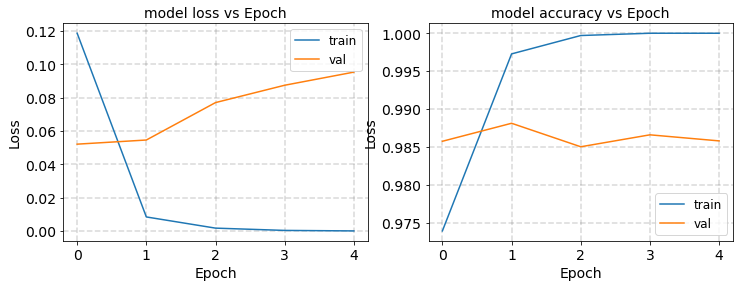

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1463 - accuracy: 0.9690 - val_loss: 0.0826 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 2s - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0947 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 2s - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.1161 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.1541 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 2s - loss: 2.8900e-04 - accuracy: 1.0000 - val_loss: 0.1812 - val_accuracy: 0.9803


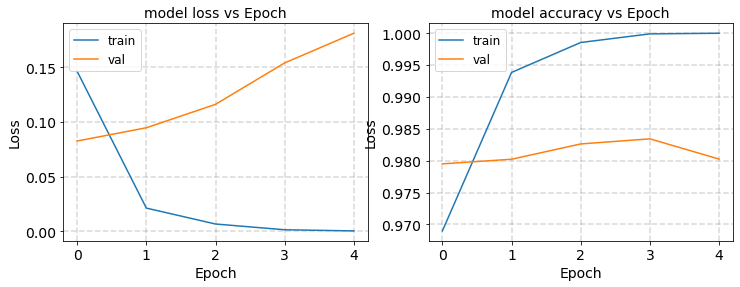

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0796 - accuracy: 0.9852 - val_loss: 0.0625 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0783 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 9.4868e-04 - accuracy: 0.9999 - val_loss: 0.0935 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 1.5308e-04 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 5.1014e-05 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9851


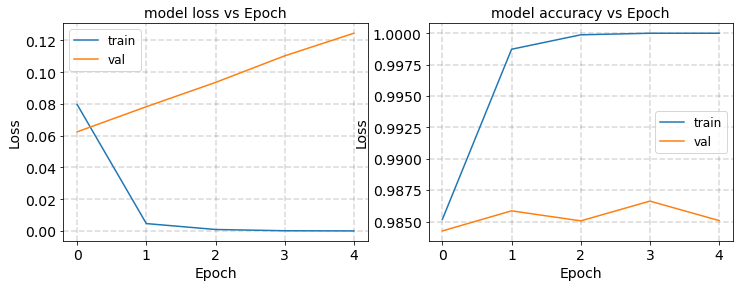

round2 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.1814 - accuracy: 0.9743 - val_loss: 0.0589 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0615 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0753 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 7.8235e-04 - accuracy: 0.9998 - val_loss: 0.0789 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 2s - loss: 1.7168e-04 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9881


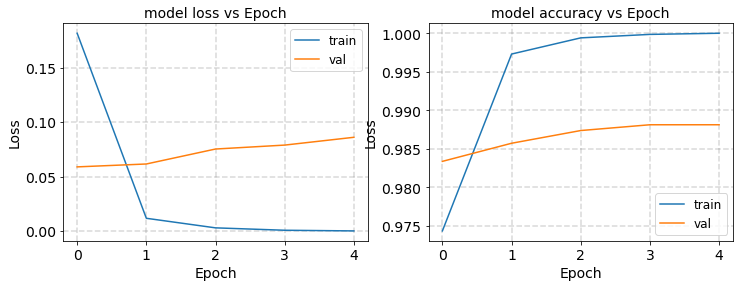

9
Epoch 1/5
1250/1250 - 2s - loss: 0.1392 - accuracy: 0.9740 - val_loss: 0.0583 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 2s - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0657 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0773 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0872 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 2s - loss: 3.7833e-04 - accuracy: 0.9999 - val_loss: 0.0941 - val_accuracy: 0.9842


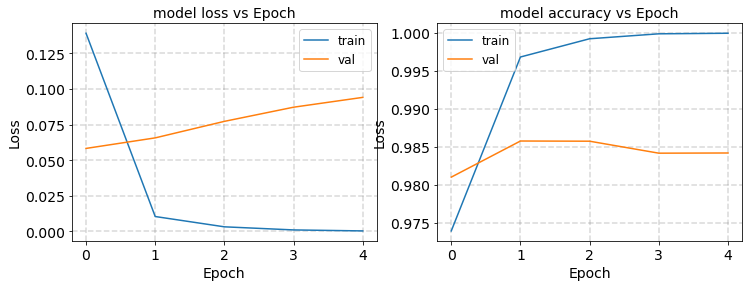

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1668 - accuracy: 0.9604 - val_loss: 0.0799 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 2s - loss: 0.0424 - accuracy: 0.9877 - val_loss: 0.0663 - val_accuracy: 0.9841
Epoch 3/5
1250/1250 - 2s - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0795 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 2s - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.1040 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.1216 - val_accuracy: 0.9794


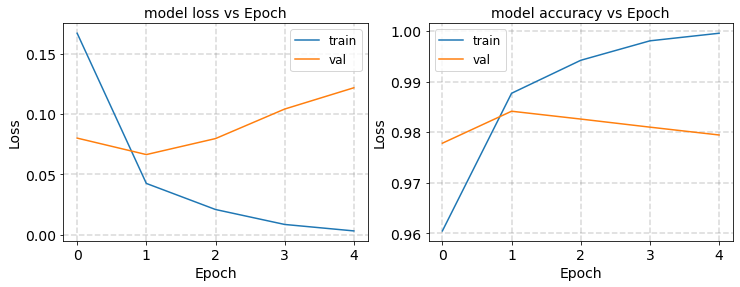

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1319 - accuracy: 0.9659 - val_loss: 0.1004 - val_accuracy: 0.9683
Epoch 2/5
1250/1250 - 2s - loss: 0.0167 - accuracy: 0.9952 - val_loss: 0.1010 - val_accuracy: 0.9746
Epoch 3/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1287 - val_accuracy: 0.9754
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1614 - val_accuracy: 0.9762
Epoch 5/5
1250/1250 - 2s - loss: 3.3973e-04 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9778


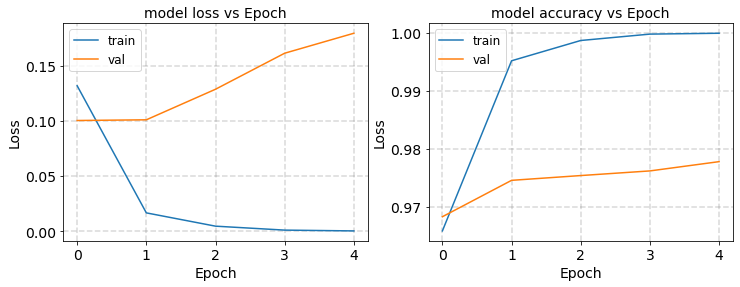

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 64)                8258      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

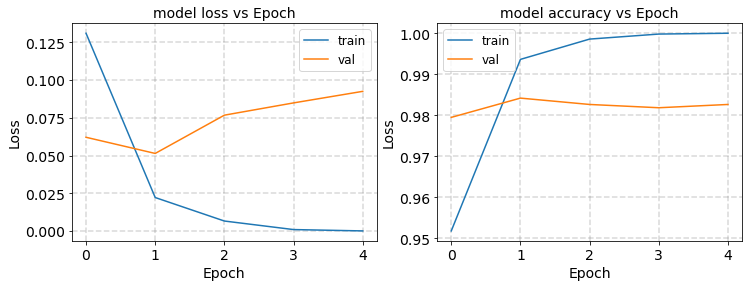

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0738 - accuracy: 0.9829 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0532 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 1.7966e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 5.6469e-05 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9906


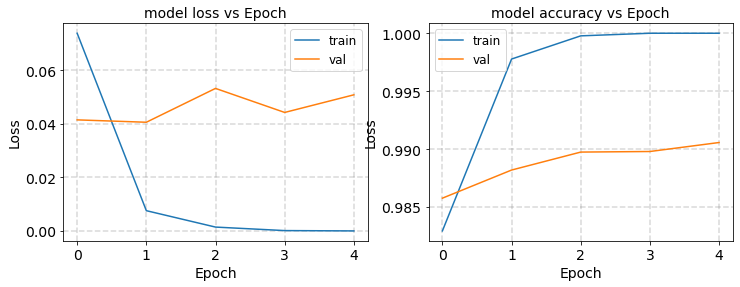

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1280 - accuracy: 0.9729 - val_loss: 0.0466 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.0476 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0540 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 8.8947e-04 - accuracy: 0.9999 - val_loss: 0.0621 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 1.7672e-04 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9890


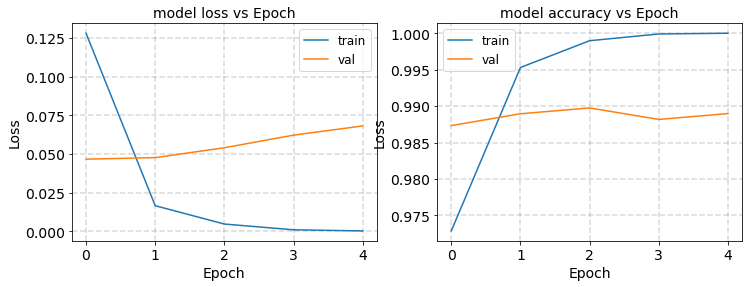

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1247 - accuracy: 0.9684 - val_loss: 0.0724 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 3s - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.0551 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 2s - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.0697 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0713 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0712 - val_accuracy: 0.9826


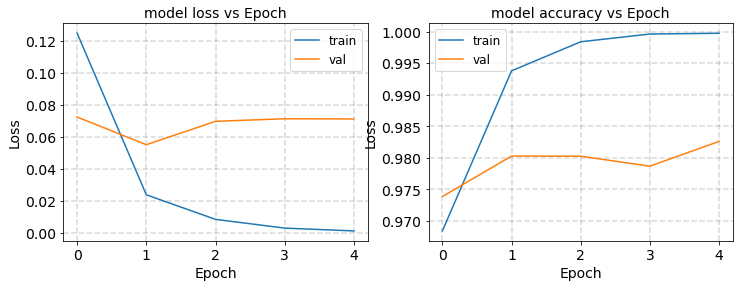

round1 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 2s - loss: 4.9723e-04 - accuracy: 0.9999 - val_loss: 0.0860 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 2s - loss: 7.1903e-05 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 3.5668e-05 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 1.8105e-05 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 9.1513e-06 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9826


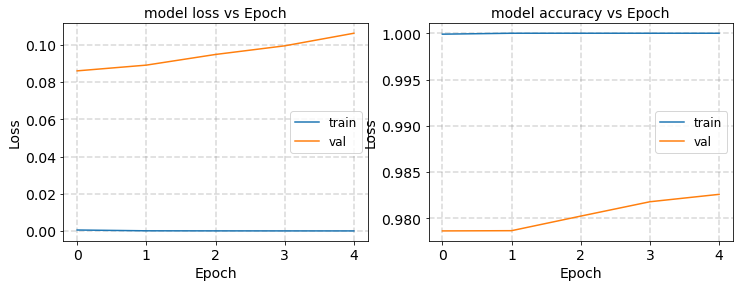

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1021 - accuracy: 0.9816 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0494 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0532 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 5.4355e-04 - accuracy: 0.9999 - val_loss: 0.0634 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 4s - loss: 1.0015e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9889


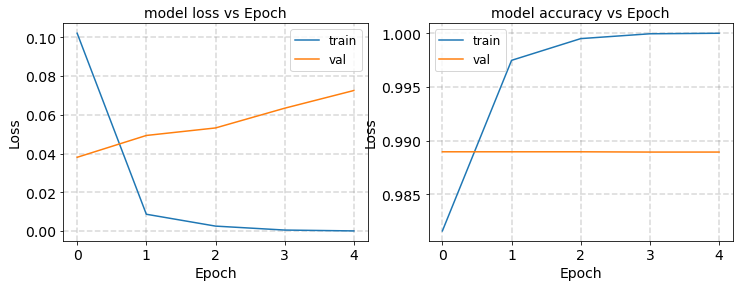

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1273 - accuracy: 0.9722 - val_loss: 0.0628 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 4s - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0633 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0815 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 7.7023e-04 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 3s - loss: 2.2148e-04 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9787


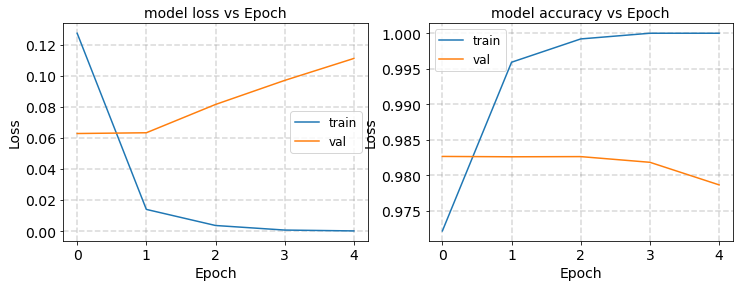

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1402 - accuracy: 0.9718 - val_loss: 0.0432 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0422 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0467 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 3.4241e-04 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9890


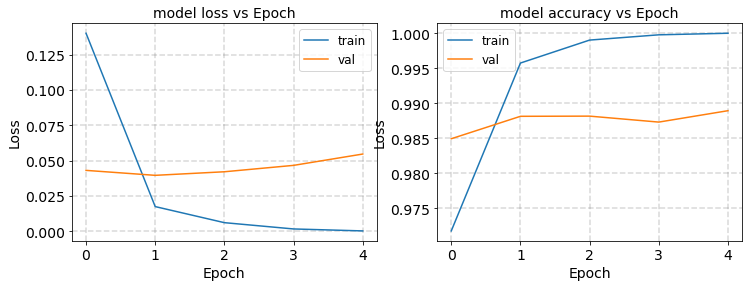

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1440 - accuracy: 0.9661 - val_loss: 0.0799 - val_accuracy: 0.9764
Epoch 2/5
1250/1250 - 3s - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0685 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0956 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1018 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 4s - loss: 3.2601e-04 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 0.9747


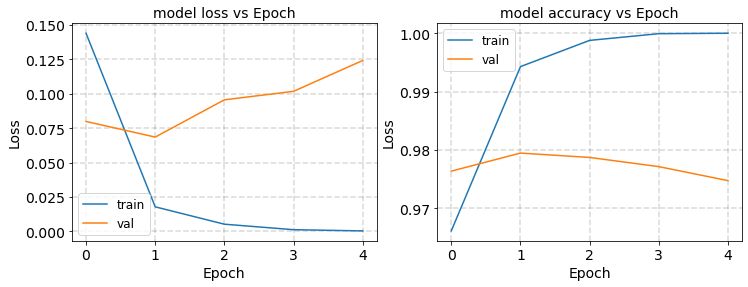

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1379 - accuracy: 0.9735 - val_loss: 0.0555 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 4s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0601 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0720 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 7.2668e-04 - accuracy: 0.9999 - val_loss: 0.0813 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.6016e-04 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9882


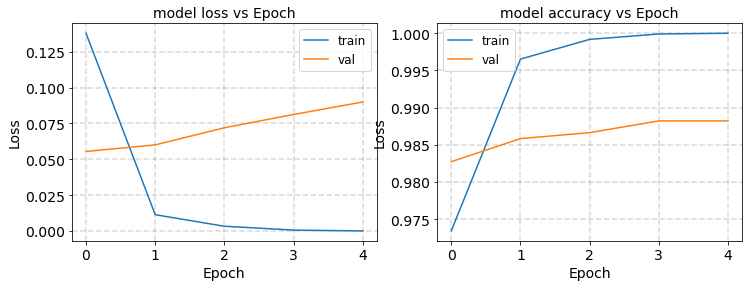

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1417 - accuracy: 0.9683 - val_loss: 0.0793 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 5s - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1022 - val_accuracy: 0.9756
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.1229 - val_accuracy: 0.9740
Epoch 4/5
1250/1250 - 3s - loss: 4.4910e-04 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 4s - loss: 1.6442e-04 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9755


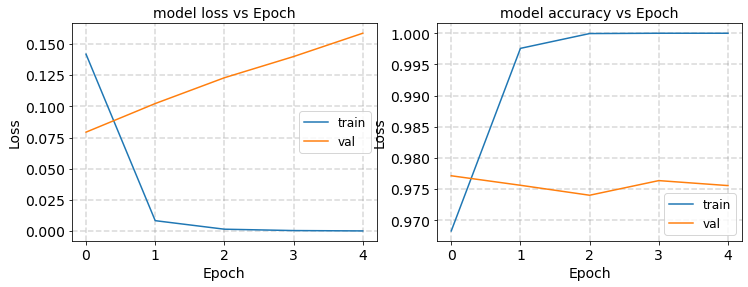

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1160 - accuracy: 0.9769 - val_loss: 0.0529 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0561 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0659 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 7.8365e-04 - accuracy: 0.9999 - val_loss: 0.0729 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 2.1484e-04 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9890


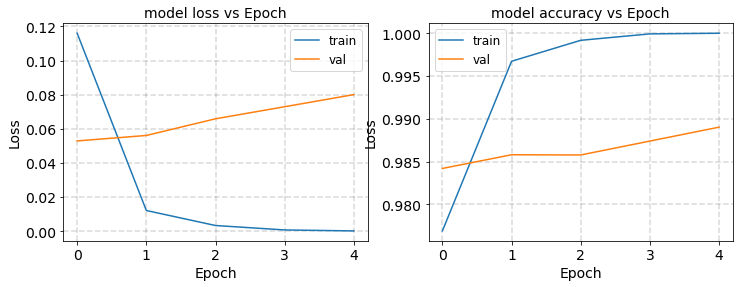

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 64)                8258      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 2
round0 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0808 - accuracy: 0.9700 - val_loss: 0.0642 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0693 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0820 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 2.1449e-04 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 5.5114e-05 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9842


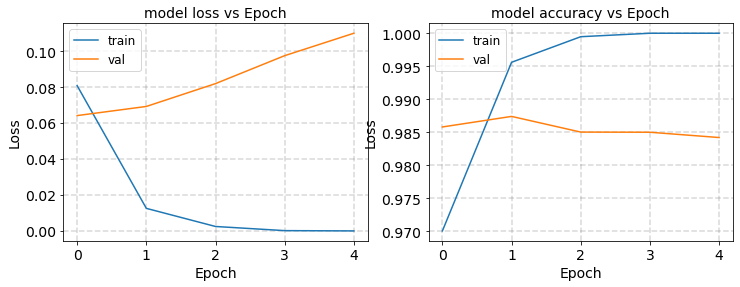

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1566 - accuracy: 0.9552 - val_loss: 0.0715 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 4s - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0626 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 5s - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.0722 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0922 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 4s - loss: 5.1106e-04 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9771


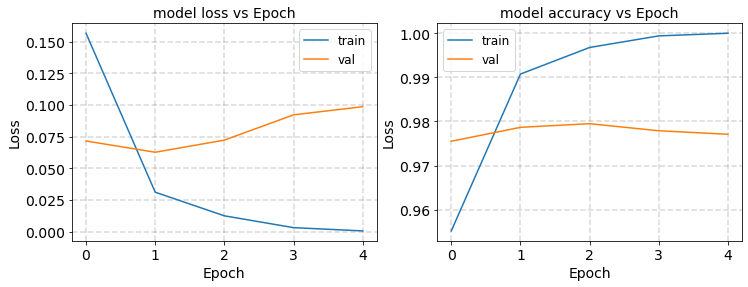

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1032 - accuracy: 0.9757 - val_loss: 0.0511 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0161 - accuracy: 0.9962 - val_loss: 0.0551 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0612 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0626 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 2.2777e-04 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9905


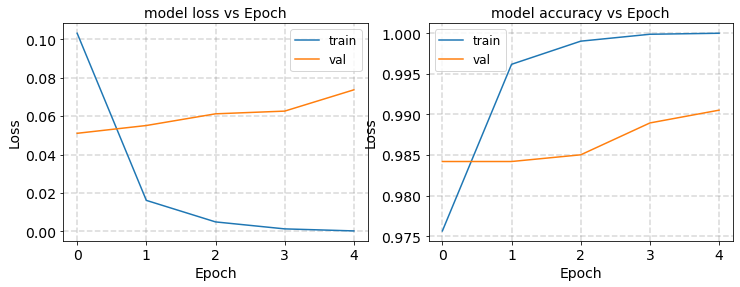

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1257 - accuracy: 0.9693 - val_loss: 0.0666 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 5s - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.0698 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 4s - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0888 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0982 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 5s - loss: 5.7278e-04 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9802


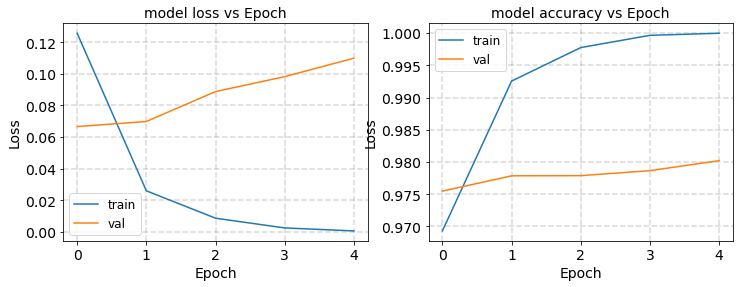

round1 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0928 - accuracy: 0.9822 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0721 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0834 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 6.9598e-04 - accuracy: 0.9999 - val_loss: 0.0957 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 9.7466e-05 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9858


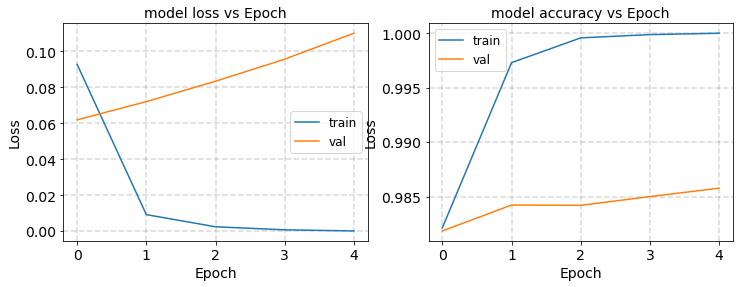

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1071 - accuracy: 0.9739 - val_loss: 0.0784 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 4s - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0792 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.1015 - val_accuracy: 0.9778
Epoch 4/5
1250/1250 - 4s - loss: 6.4161e-04 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9801
Epoch 5/5
1250/1250 - 4s - loss: 1.9161e-04 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 0.9817


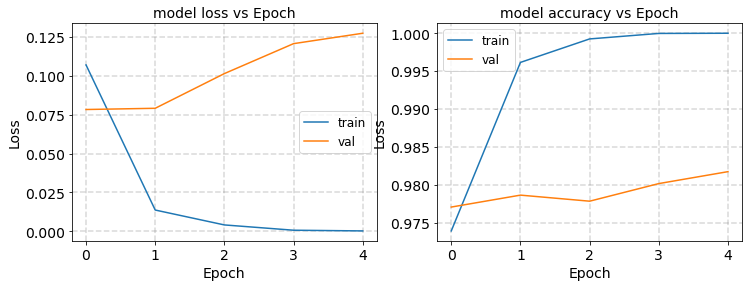

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1050 - accuracy: 0.9790 - val_loss: 0.0728 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 4s - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.0672 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0719 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0910 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 5.3291e-04 - accuracy: 0.9998 - val_loss: 0.0883 - val_accuracy: 0.9866


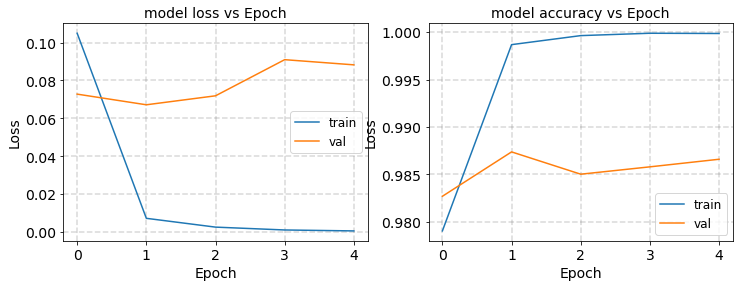

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1159 - accuracy: 0.9734 - val_loss: 0.0812 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0914 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.1089 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1304 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 5.7269e-04 - accuracy: 0.9999 - val_loss: 0.1597 - val_accuracy: 0.9787


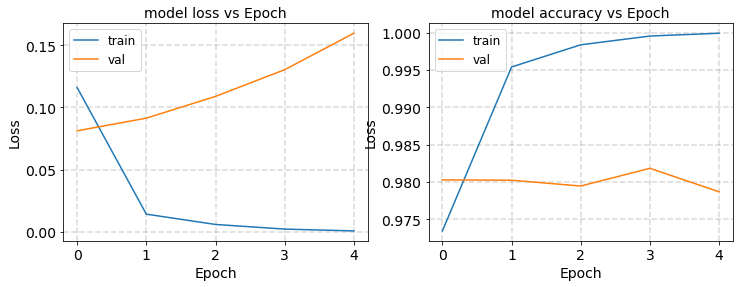

round2 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1018 - accuracy: 0.9814 - val_loss: 0.0997 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.1336 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 7.9862e-04 - accuracy: 0.9999 - val_loss: 0.1610 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 1.4528e-04 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 3.9724e-05 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9882


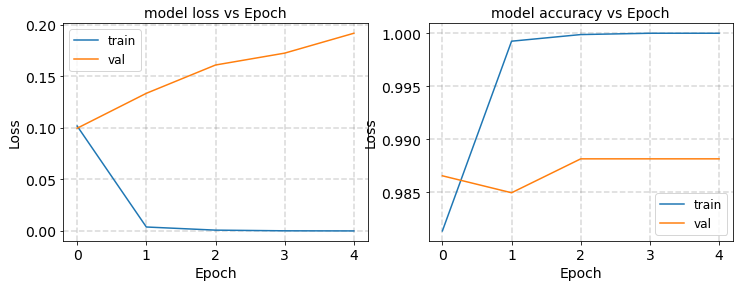

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1366 - accuracy: 0.9765 - val_loss: 0.0780 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 3s - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0866 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.1038 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1253 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 3s - loss: 7.4075e-04 - accuracy: 0.9998 - val_loss: 0.1377 - val_accuracy: 0.9803


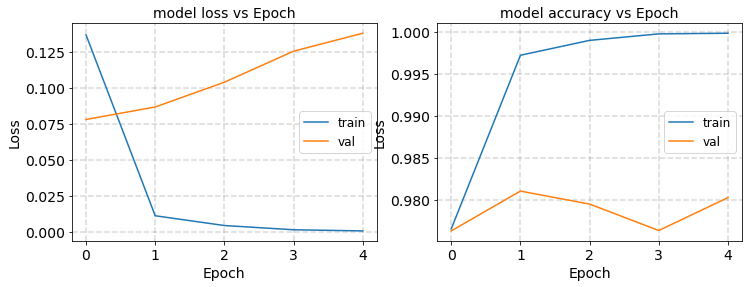

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1158 - accuracy: 0.9765 - val_loss: 0.0687 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0814 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1061 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1135 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 3.5723e-04 - accuracy: 0.9999 - val_loss: 0.1306 - val_accuracy: 0.9874


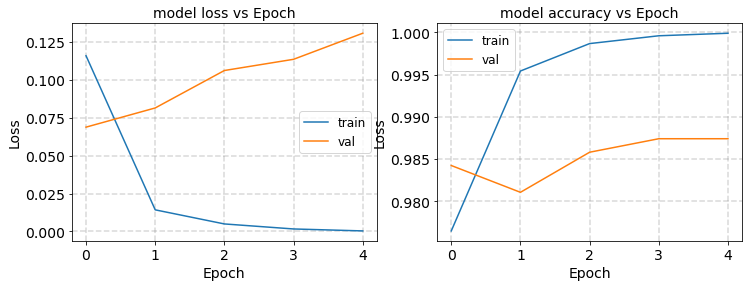

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1608 - accuracy: 0.9710 - val_loss: 0.0718 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 3s - loss: 0.0175 - accuracy: 0.9953 - val_loss: 0.0774 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0930 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 9.0811e-04 - accuracy: 0.9999 - val_loss: 0.1034 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 2.1950e-04 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9826


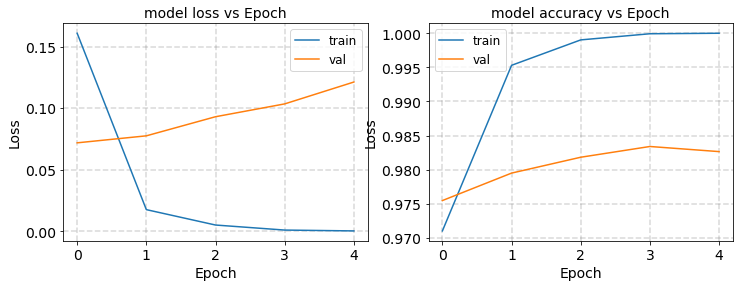

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 64)                8258      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

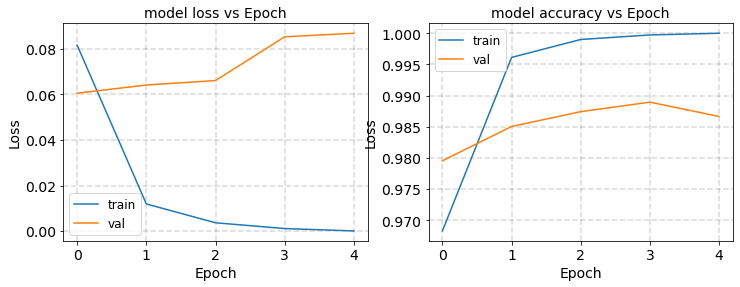

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1551 - accuracy: 0.9573 - val_loss: 0.0639 - val_accuracy: 0.9756
Epoch 2/5
1250/1250 - 3s - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.0574 - val_accuracy: 0.9764
Epoch 3/5
1250/1250 - 3s - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0526 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0537 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 3.1813e-04 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9874


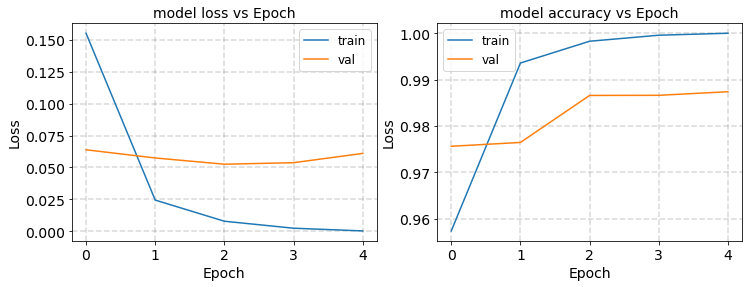

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1143 - accuracy: 0.9757 - val_loss: 0.0504 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.0451 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0444 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0484 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 6.6559e-04 - accuracy: 0.9999 - val_loss: 0.0559 - val_accuracy: 0.9890


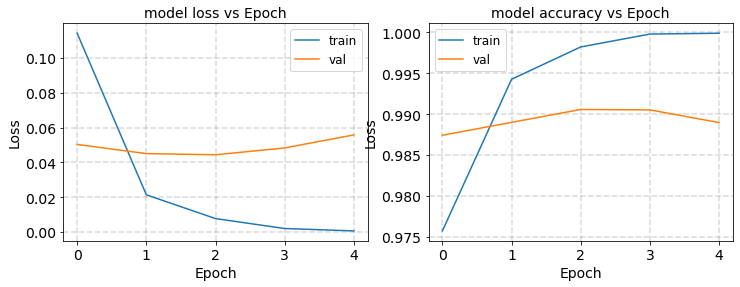

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1365 - accuracy: 0.9694 - val_loss: 0.0767 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 3s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.0794 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 4s - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0897 - val_accuracy: 0.9763
Epoch 4/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0964 - val_accuracy: 0.9762
Epoch 5/5
1250/1250 - 4s - loss: 4.6321e-04 - accuracy: 0.9999 - val_loss: 0.1140 - val_accuracy: 0.9770


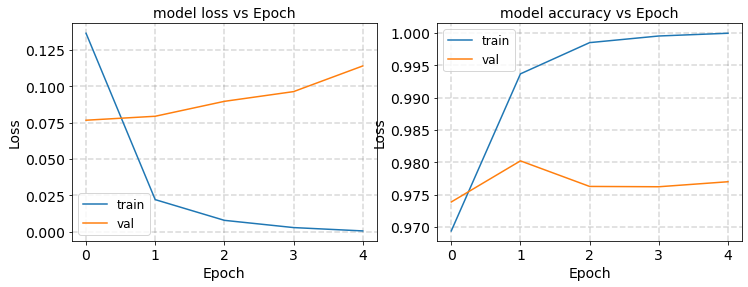

round1 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 1.1403e-04 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 4s - loss: 4.2933e-05 - accuracy: 1.0000 - val_loss: 0.1333 - val_accuracy: 0.9778
Epoch 3/5
1250/1250 - 4s - loss: 1.8275e-05 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 4s - loss: 7.7231e-06 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9778
Epoch 5/5
1250/1250 - 4s - loss: 3.2482e-06 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 0.9778


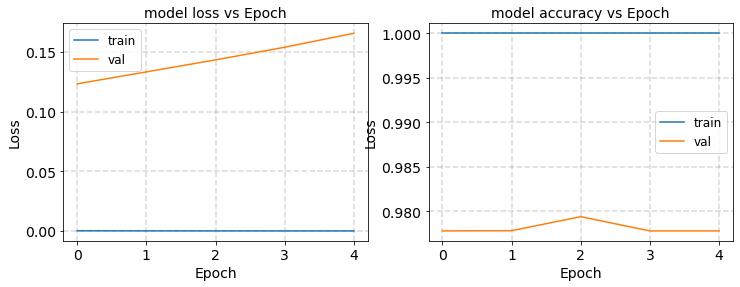

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1314 - accuracy: 0.9764 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.1027 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1178 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 5s - loss: 4.3397e-04 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 1.0703e-04 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9826


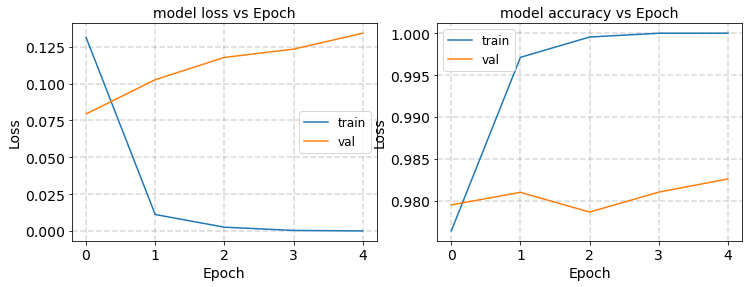

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0907 - accuracy: 0.9846 - val_loss: 0.0570 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 5s - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0623 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0689 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 3.1523e-04 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 9.0490e-05 - accuracy: 1.0000 - val_loss: 0.0954 - val_accuracy: 0.9882


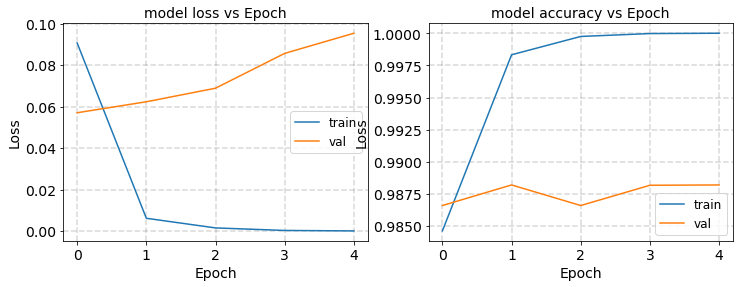

2
Epoch 1/5
1250/1250 - 5s - loss: 0.2288 - accuracy: 0.9523 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 4s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0604 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0502 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0558 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0625 - val_accuracy: 0.9873


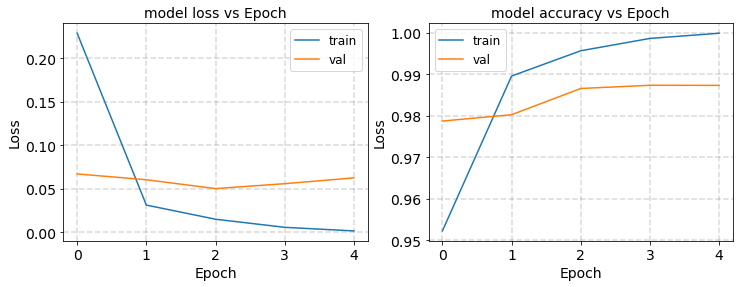

round2 [8 9 2 3]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1465 - accuracy: 0.9589 - val_loss: 0.0769 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 4s - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0797 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.0877 - val_accuracy: 0.9778
Epoch 4/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0999 - val_accuracy: 0.9809
Epoch 5/5
1250/1250 - 5s - loss: 8.9315e-04 - accuracy: 0.9998 - val_loss: 0.1051 - val_accuracy: 0.9850


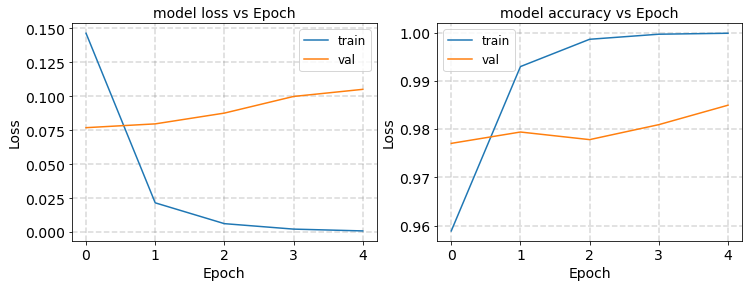

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1162 - accuracy: 0.9788 - val_loss: 0.0525 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0647 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0835 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 2.9862e-04 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 1.2069e-04 - accuracy: 1.0000 - val_loss: 0.1171 - val_accuracy: 0.9898


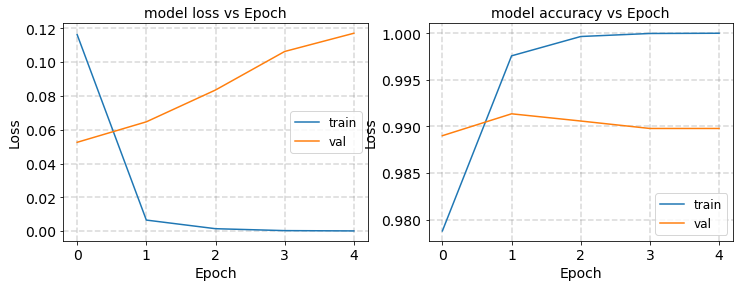

2
Epoch 1/5
1250/1250 - 5s - loss: 0.2547 - accuracy: 0.9273 - val_loss: 0.0638 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 4s - loss: 0.0388 - accuracy: 0.9834 - val_loss: 0.0606 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 0.0217 - accuracy: 0.9904 - val_loss: 0.0580 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0104 - accuracy: 0.9952 - val_loss: 0.0646 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 4s - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.0703 - val_accuracy: 0.9865


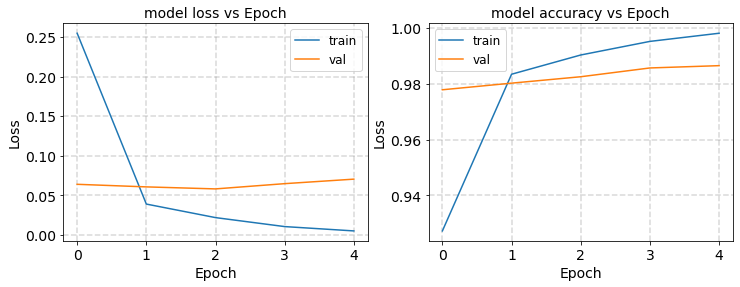

3
Epoch 1/5
1250/1250 - 4s - loss: 0.3516 - accuracy: 0.8509 - val_loss: 0.1823 - val_accuracy: 0.9542
Epoch 2/5
1250/1250 - 4s - loss: 0.1154 - accuracy: 0.9783 - val_loss: 0.1185 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 4s - loss: 0.0665 - accuracy: 0.9880 - val_loss: 0.0983 - val_accuracy: 0.9739
Epoch 4/5
1250/1250 - 4s - loss: 0.0414 - accuracy: 0.9930 - val_loss: 0.0926 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 4s - loss: 0.0282 - accuracy: 0.9954 - val_loss: 0.0917 - val_accuracy: 0.9779


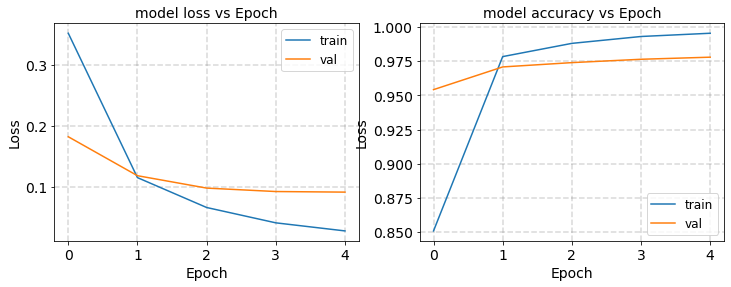

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 64)                8258      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

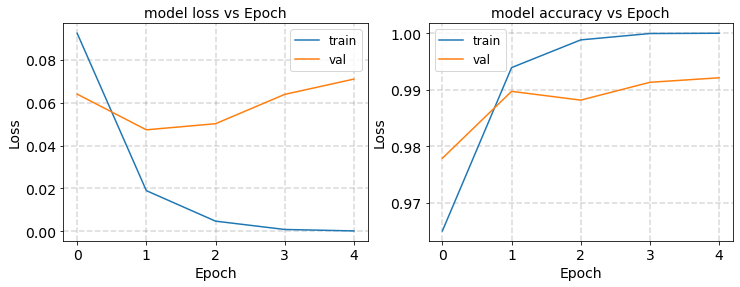

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1545 - accuracy: 0.9558 - val_loss: 0.0824 - val_accuracy: 0.9724
Epoch 2/5
1250/1250 - 3s - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 3/5
1250/1250 - 3s - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.0791 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1014 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 2s - loss: 3.1805e-04 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9818


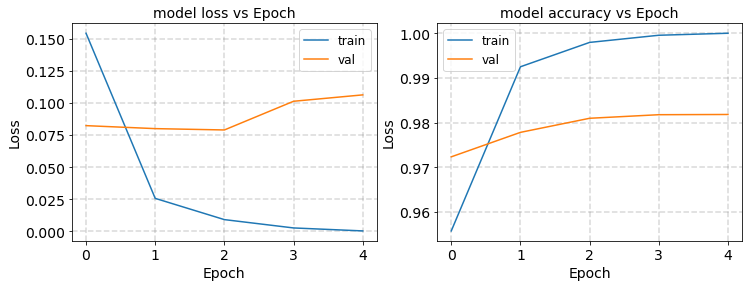

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1527 - accuracy: 0.9628 - val_loss: 0.0807 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 2s - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0735 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 2s - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0975 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 3s - loss: 8.1867e-04 - accuracy: 0.9999 - val_loss: 0.1107 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 2s - loss: 2.0459e-04 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9818


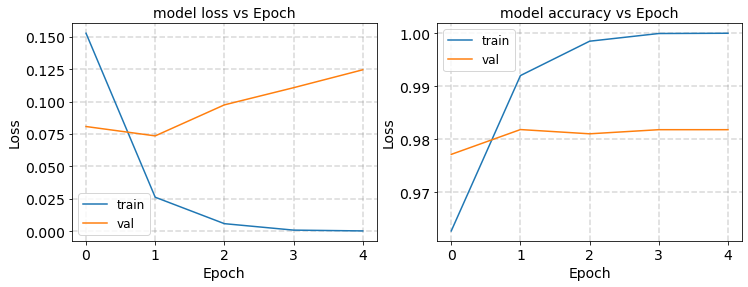

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1308 - accuracy: 0.9706 - val_loss: 0.0710 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0456 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0492 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0504 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 2.6234e-04 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9889


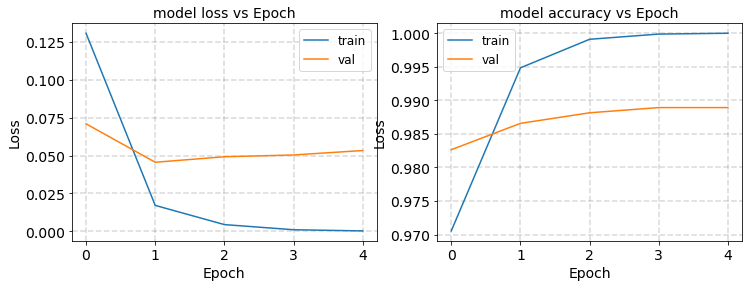

round1 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.1056 - accuracy: 0.9783 - val_loss: 0.0686 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 2s - loss: 0.0094 - accuracy: 0.9981 - val_loss: 0.0752 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.1047 - val_accuracy: 0.9740
Epoch 4/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0901 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 1.4131e-04 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 0.9826


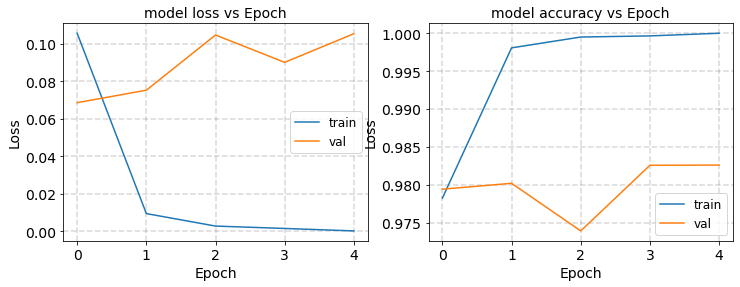

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1169 - accuracy: 0.9739 - val_loss: 0.0662 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0762 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.1040 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1168 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 4s - loss: 2.4962e-04 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9802


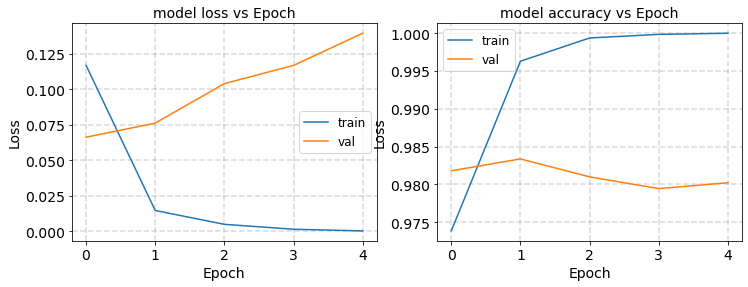

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1125 - accuracy: 0.9783 - val_loss: 0.0615 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0611 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0709 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 7.3223e-04 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 2.3013e-04 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9882


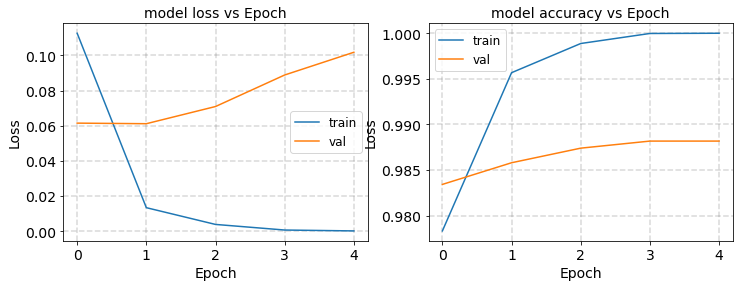

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1989 - accuracy: 0.9624 - val_loss: 0.0650 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0543 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0579 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0662 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 4s - loss: 2.0487e-04 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9859


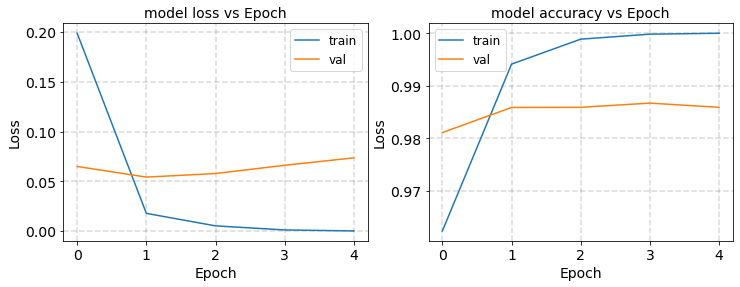

round2 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 6.7568e-05 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 2.7931e-05 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 5s - loss: 1.2023e-05 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 4s - loss: 5.2156e-06 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 2.2954e-06 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9859


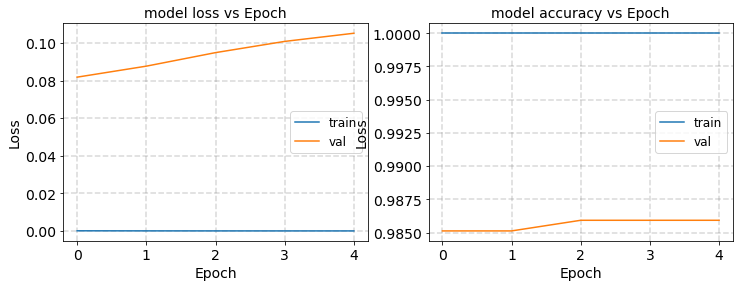

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2284 - accuracy: 0.9546 - val_loss: 0.0801 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0923 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 4s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.1155 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1200 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 5.5973e-04 - accuracy: 0.9999 - val_loss: 0.1443 - val_accuracy: 0.9818


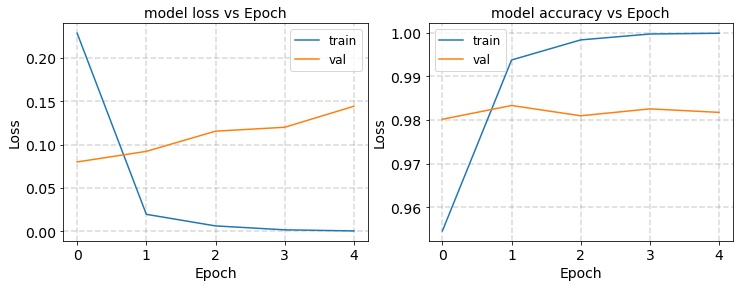

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1738 - accuracy: 0.9618 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 4s - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0752 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.0869 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 5s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0985 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1164 - val_accuracy: 0.9810


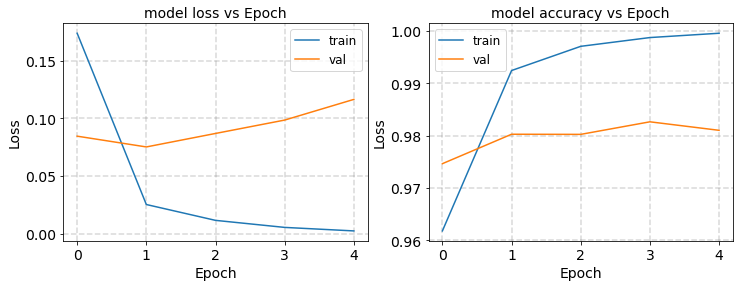

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1295 - accuracy: 0.9760 - val_loss: 0.0728 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 4s - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0657 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0674 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0772 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 9.0052e-04 - accuracy: 0.9998 - val_loss: 0.0914 - val_accuracy: 0.9834


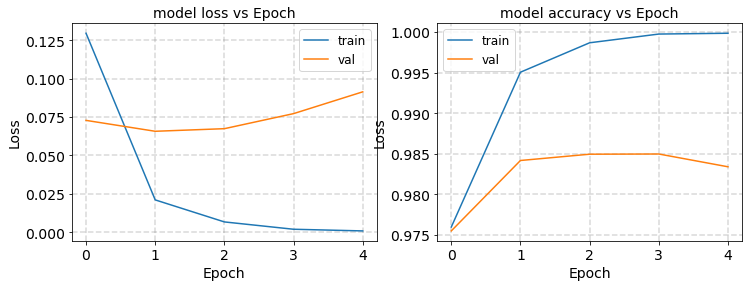

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 64)                8258      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

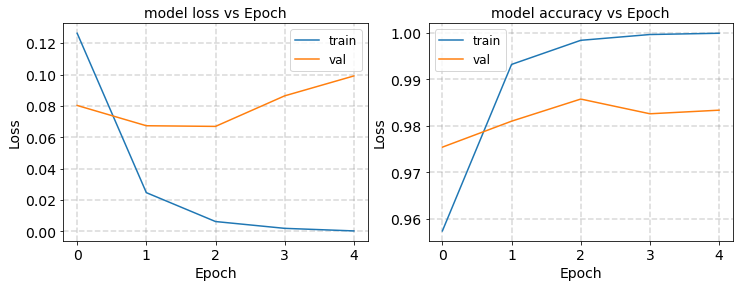

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1615 - accuracy: 0.9543 - val_loss: 0.0810 - val_accuracy: 0.9684
Epoch 2/5
1250/1250 - 4s - loss: 0.0392 - accuracy: 0.9886 - val_loss: 0.0701 - val_accuracy: 0.9804
Epoch 3/5
1250/1250 - 4s - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.0821 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.1014 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1119 - val_accuracy: 0.9826


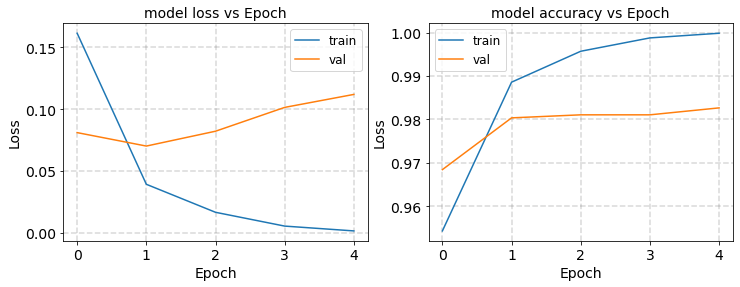

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1149 - accuracy: 0.9724 - val_loss: 0.0481 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0160 - accuracy: 0.9960 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0549 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0631 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 4s - loss: 2.9971e-04 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9873


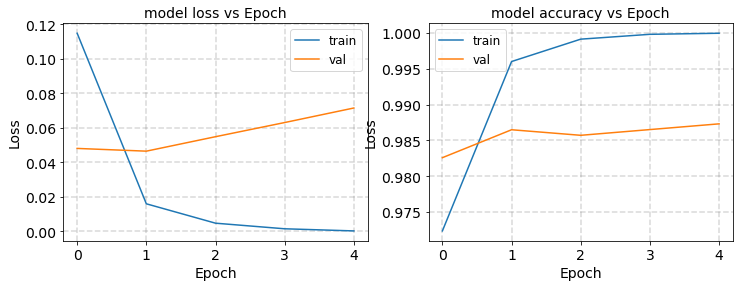

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1196 - accuracy: 0.9737 - val_loss: 0.0700 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0825 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0926 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 8.4949e-04 - accuracy: 0.9998 - val_loss: 0.1038 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 3s - loss: 2.3828e-04 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9834


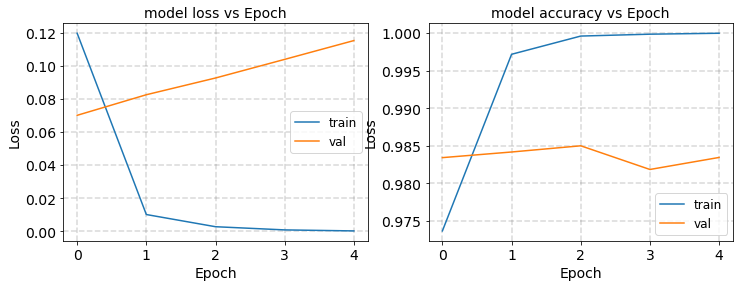

round1 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1164 - accuracy: 0.9732 - val_loss: 0.0825 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 4s - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.1119 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1494 - val_accuracy: 0.9772
Epoch 4/5
1250/1250 - 3s - loss: 2.6199e-04 - accuracy: 1.0000 - val_loss: 0.1696 - val_accuracy: 0.9772
Epoch 5/5
1250/1250 - 3s - loss: 1.0048e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9772


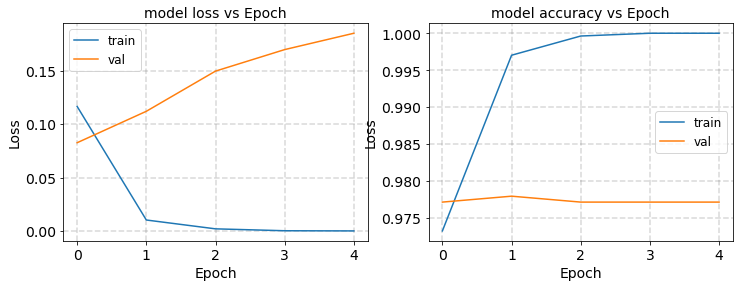

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0909 - accuracy: 0.9848 - val_loss: 0.0639 - val_accuracy: 0.9849
Epoch 2/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0721 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0889 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1042 - val_accuracy: 0.9849
Epoch 5/5
1250/1250 - 3s - loss: 2.9170e-04 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9873


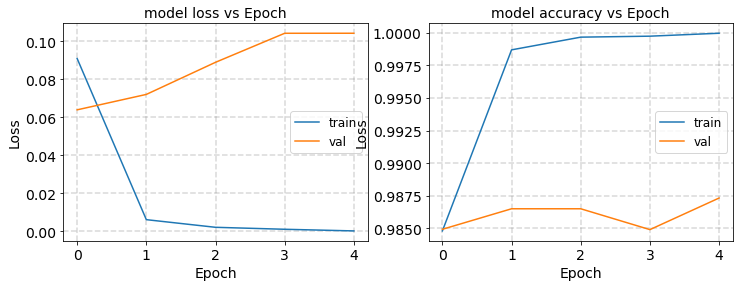

3
Epoch 1/5
1250/1250 - 3s - loss: 0.2059 - accuracy: 0.9545 - val_loss: 0.0952 - val_accuracy: 0.9699
Epoch 2/5
1250/1250 - 3s - loss: 0.0453 - accuracy: 0.9854 - val_loss: 0.0805 - val_accuracy: 0.9771
Epoch 3/5
1250/1250 - 3s - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.0915 - val_accuracy: 0.9755
Epoch 4/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0958 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.1151 - val_accuracy: 0.9779


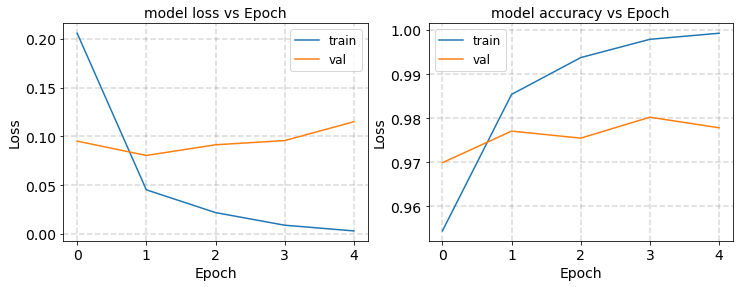

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1523 - accuracy: 0.9627 - val_loss: 0.0770 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 2s - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.0671 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0769 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0980 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1028 - val_accuracy: 0.9866


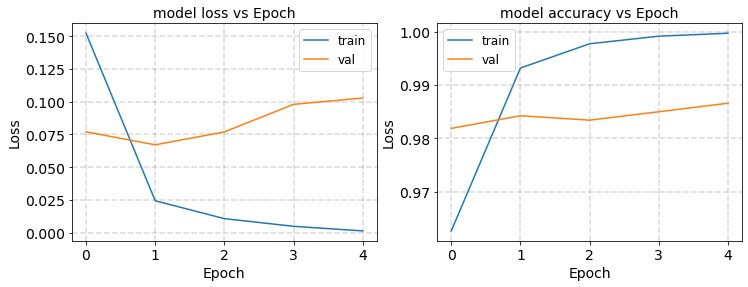

round2 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 2s - loss: 0.1720 - accuracy: 0.9559 - val_loss: 0.0784 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 2s - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 3/5
1250/1250 - 2s - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0879 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.1045 - val_accuracy: 0.9796
Epoch 5/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.1290 - val_accuracy: 0.9787


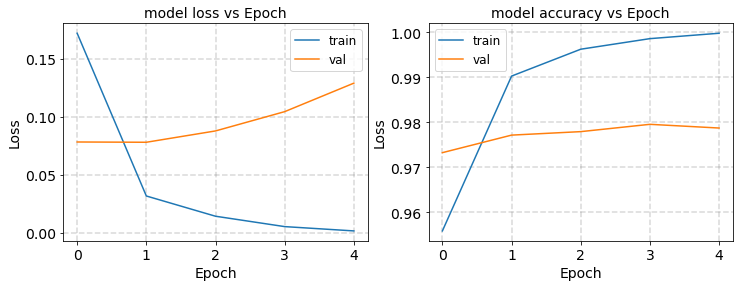

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1684 - accuracy: 0.9622 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 2s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0847 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 3s - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0896 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0986 - val_accuracy: 0.9778
Epoch 5/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.1172 - val_accuracy: 0.9779


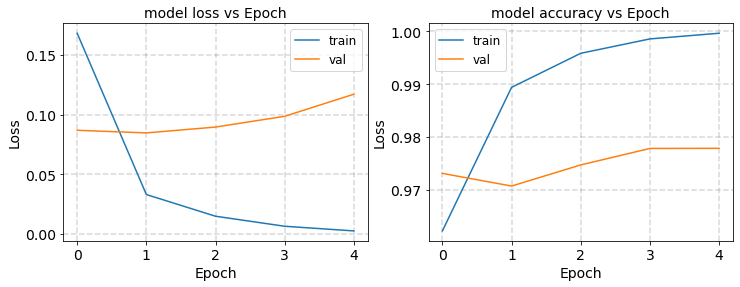

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1155 - accuracy: 0.9789 - val_loss: 0.0901 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 2s - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.0896 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.1003 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1059 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1233 - val_accuracy: 0.9865


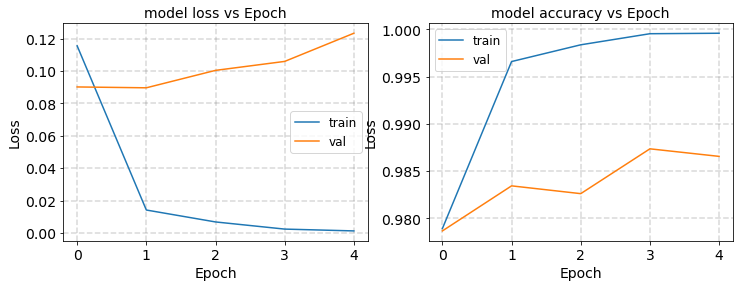

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1796 - accuracy: 0.9701 - val_loss: 0.0682 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0657 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.0749 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0879 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0903 - val_accuracy: 0.9881


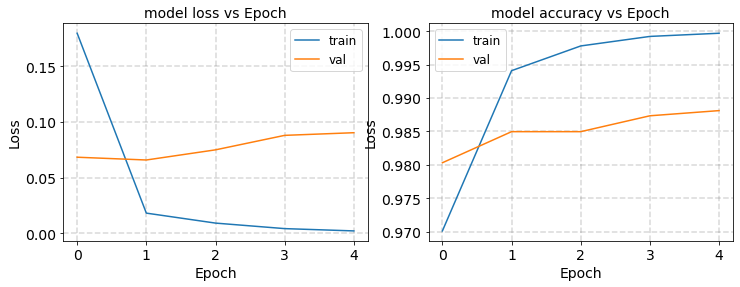

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 64)                8258      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 6
round0 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1333 - accuracy: 0.9478 - val_loss: 0.0587 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0605 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0745 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0791 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 2.6155e-04 - accuracy: 1.0000 - val_loss: 0.0920 - val_accuracy: 0.9834


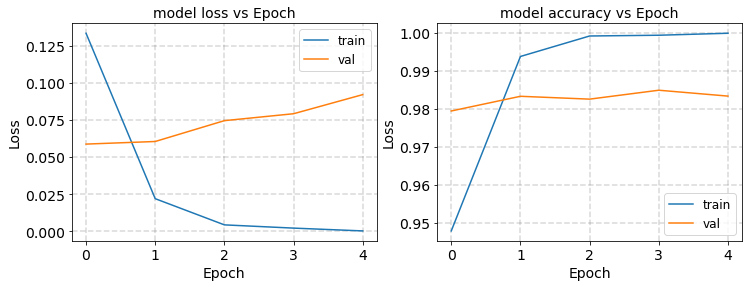

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1081 - accuracy: 0.9754 - val_loss: 0.0429 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.0350 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.0421 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0436 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 2.0683e-04 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9929


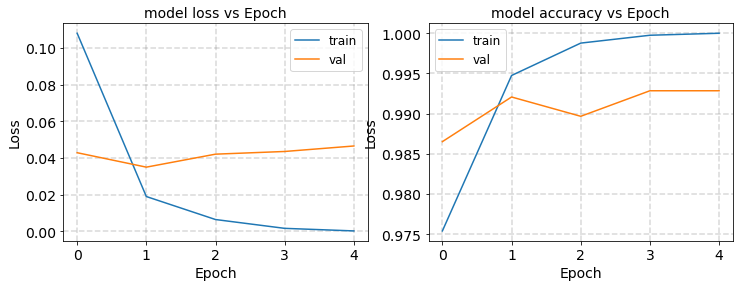

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1399 - accuracy: 0.9647 - val_loss: 0.0602 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 4s - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0109 - accuracy: 0.9974 - val_loss: 0.0684 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0680 - val_accuracy: 0.9849
Epoch 5/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0713 - val_accuracy: 0.9841


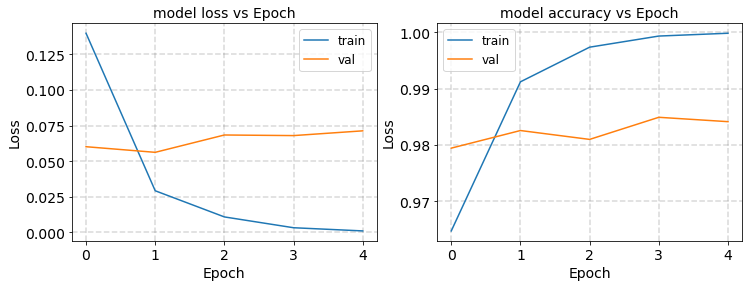

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0993 - accuracy: 0.9784 - val_loss: 0.0574 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0670 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0770 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 6.2382e-04 - accuracy: 0.9999 - val_loss: 0.0899 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 5s - loss: 1.5551e-04 - accuracy: 1.0000 - val_loss: 0.1040 - val_accuracy: 0.9866


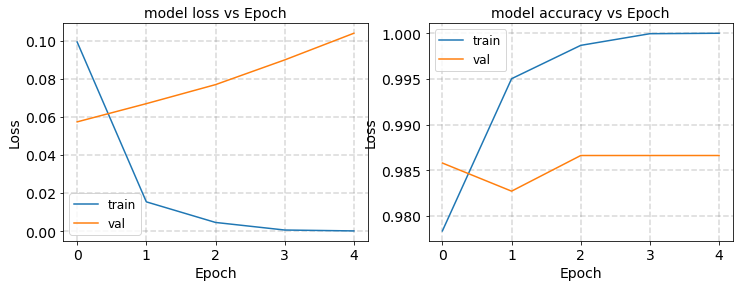

round1 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.1252 - accuracy: 0.9779 - val_loss: 0.0522 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 4s - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0589 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0612 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 3.3564e-04 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 1.1155e-04 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9921


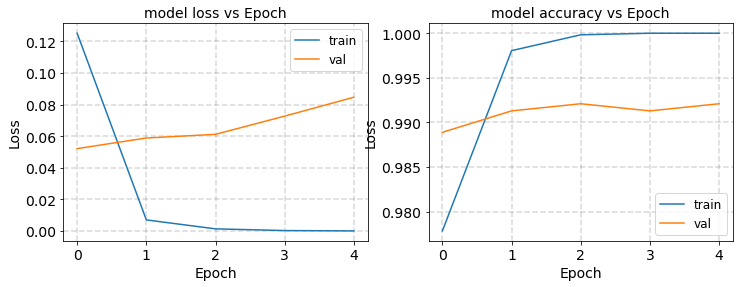

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1051 - accuracy: 0.9799 - val_loss: 0.0671 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0965 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 2.3883e-04 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 8.3578e-05 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 3.4023e-05 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 0.9834


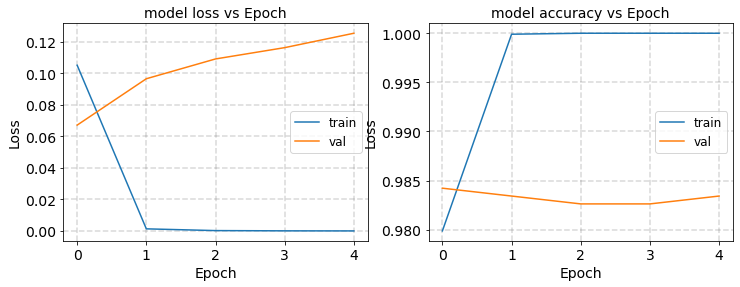

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1394 - accuracy: 0.9681 - val_loss: 0.0820 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 4s - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0858 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.1051 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 4s - loss: 8.4283e-04 - accuracy: 0.9998 - val_loss: 0.1302 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 4s - loss: 1.9214e-04 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9771


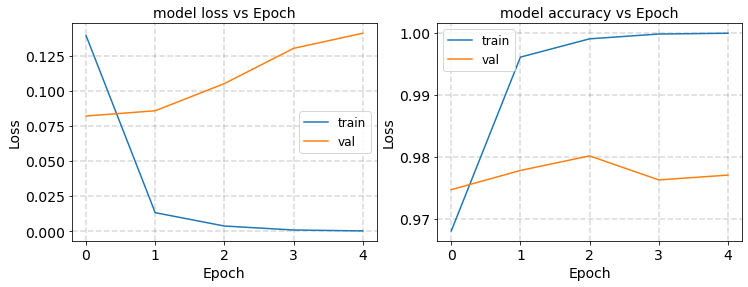

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1623 - accuracy: 0.9595 - val_loss: 0.0764 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 3s - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0672 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.0753 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.1038 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1164 - val_accuracy: 0.9786


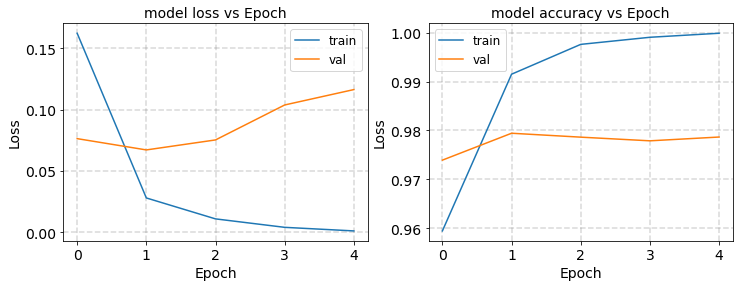

round2 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 2.2870e-04 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 3s - loss: 7.3326e-05 - accuracy: 1.0000 - val_loss: 0.1340 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 2.8552e-05 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 1.2820e-05 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 4s - loss: 5.7634e-06 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9794


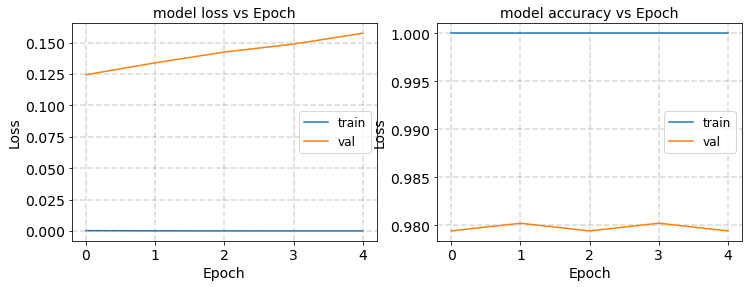

2
Epoch 1/5
1250/1250 - 4s - loss: 0.2084 - accuracy: 0.9632 - val_loss: 0.0695 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 3s - loss: 0.0255 - accuracy: 0.9906 - val_loss: 0.0624 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0718 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0707 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0804 - val_accuracy: 0.9905


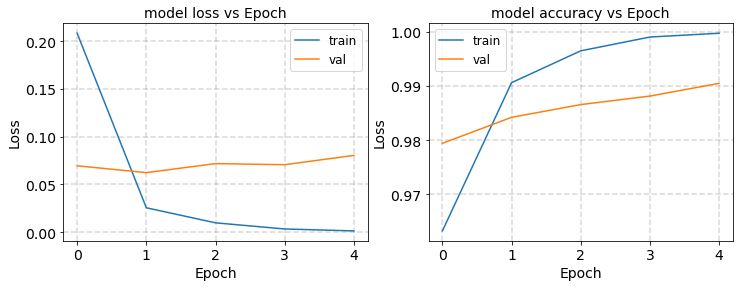

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1521 - accuracy: 0.9582 - val_loss: 0.0913 - val_accuracy: 0.9724
Epoch 2/5
1250/1250 - 4s - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1010 - val_accuracy: 0.9716
Epoch 3/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.1146 - val_accuracy: 0.9748
Epoch 4/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1346 - val_accuracy: 0.9740
Epoch 5/5
1250/1250 - 3s - loss: 5.7509e-04 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9756


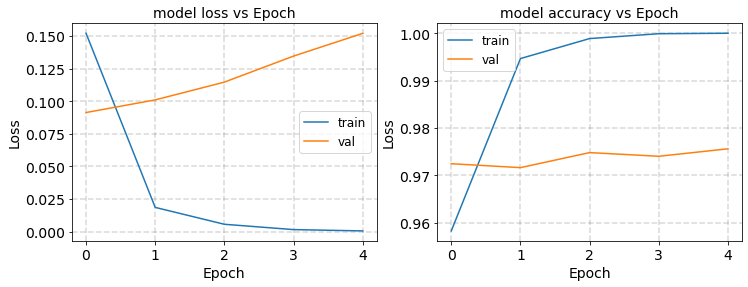

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1409 - accuracy: 0.9714 - val_loss: 0.0682 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 4s - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0620 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0627 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 3s - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0800 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0903 - val_accuracy: 0.9842


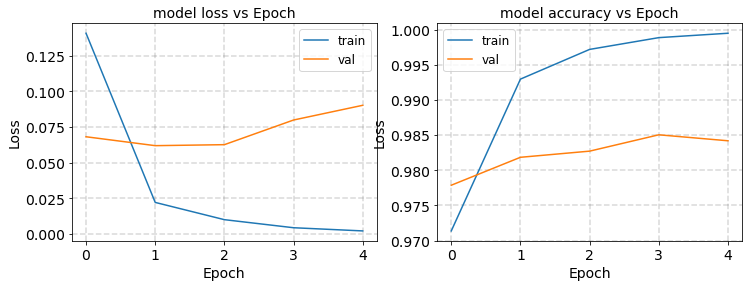

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 64)                8258      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

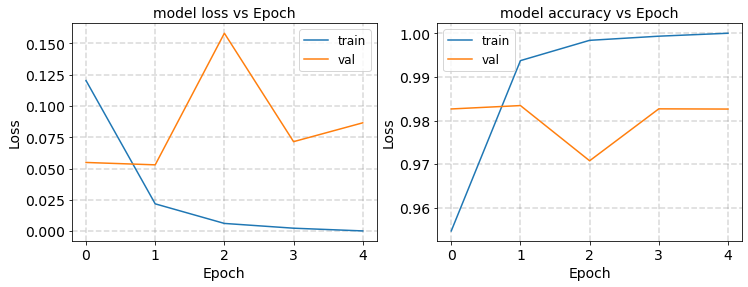

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1174 - accuracy: 0.9721 - val_loss: 0.0507 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0413 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0463 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0489 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 6.0184e-04 - accuracy: 0.9999 - val_loss: 0.0577 - val_accuracy: 0.9905


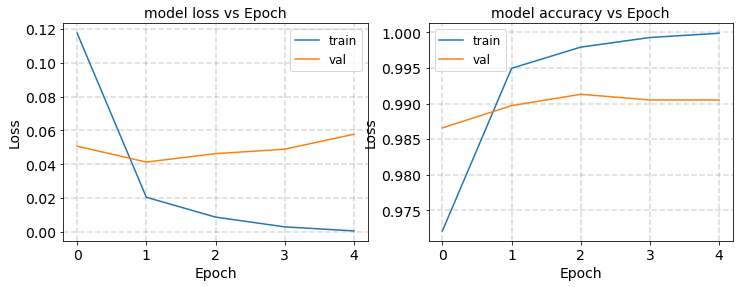

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0991 - accuracy: 0.9771 - val_loss: 0.0520 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0574 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0643 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 3s - loss: 3.0380e-04 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 3s - loss: 9.6996e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9827


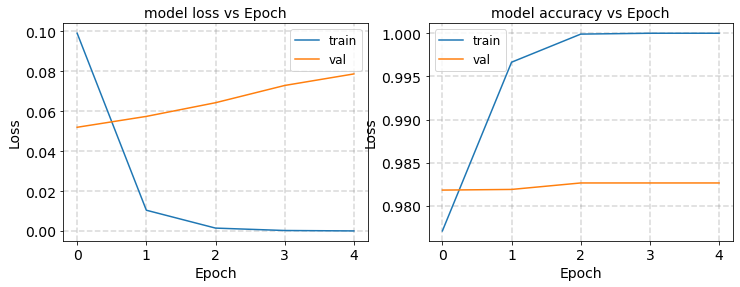

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1217 - accuracy: 0.9704 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 3s - loss: 0.0208 - accuracy: 0.9946 - val_loss: 0.0832 - val_accuracy: 0.9764
Epoch 3/5
1250/1250 - 3s - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0957 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0982 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1181 - val_accuracy: 0.9834


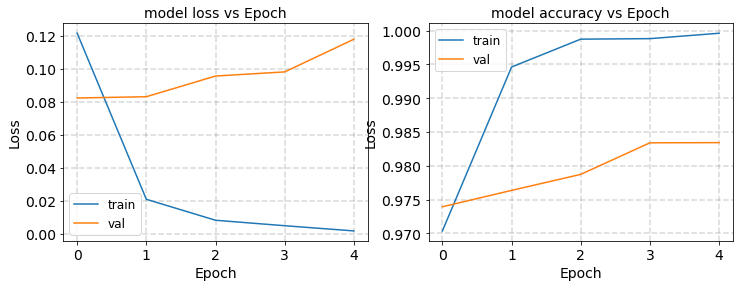

round1 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.1086 - accuracy: 0.9720 - val_loss: 0.0626 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0760 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0933 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 4.2354e-04 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 8.4970e-05 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9811


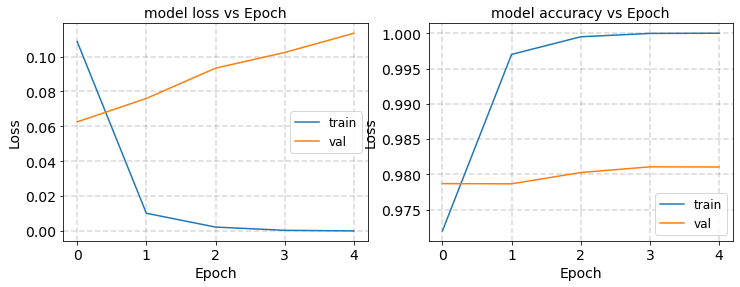

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1033 - accuracy: 0.9806 - val_loss: 0.0818 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0923 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 6.3748e-04 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 1.8766e-04 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 7.0912e-05 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9818


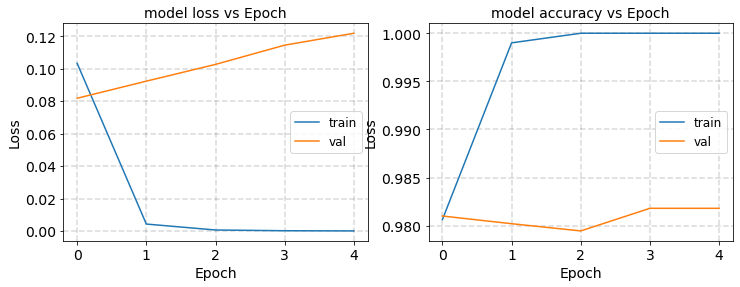

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1224 - accuracy: 0.9740 - val_loss: 0.0538 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0530 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0572 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0680 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 5s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0748 - val_accuracy: 0.9874


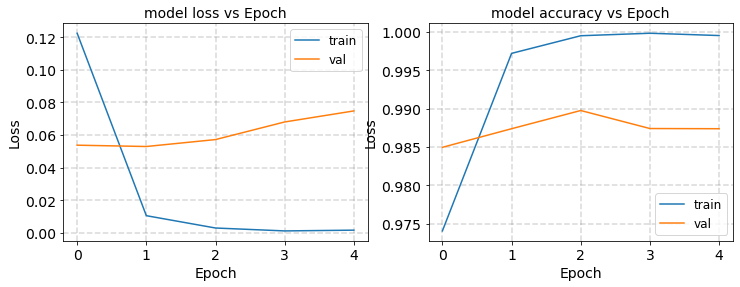

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1446 - accuracy: 0.9717 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 4s - loss: 0.0198 - accuracy: 0.9948 - val_loss: 0.0910 - val_accuracy: 0.9700
Epoch 3/5
1250/1250 - 4s - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0643 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0679 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 4.4258e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9865


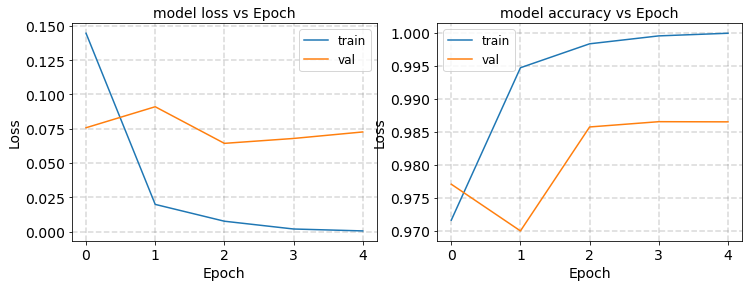

round2 [2 3 8 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.1103 - accuracy: 0.9785 - val_loss: 0.0619 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0765 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 7.9166e-04 - accuracy: 0.9999 - val_loss: 0.0888 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 1.7235e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 6.3273e-05 - accuracy: 1.0000 - val_loss: 0.1050 - val_accuracy: 0.9889


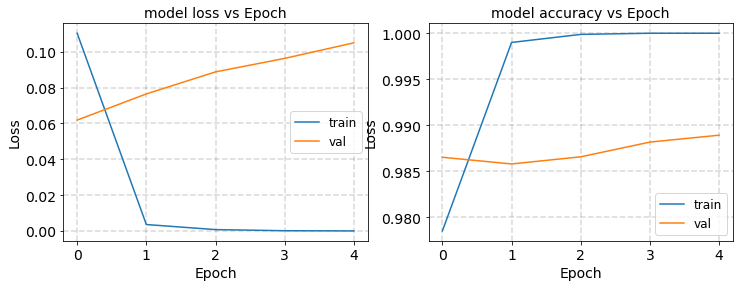

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1827 - accuracy: 0.9589 - val_loss: 0.0853 - val_accuracy: 0.9754
Epoch 2/5
1250/1250 - 4s - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.0717 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0760 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 5s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0937 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1053 - val_accuracy: 0.9803


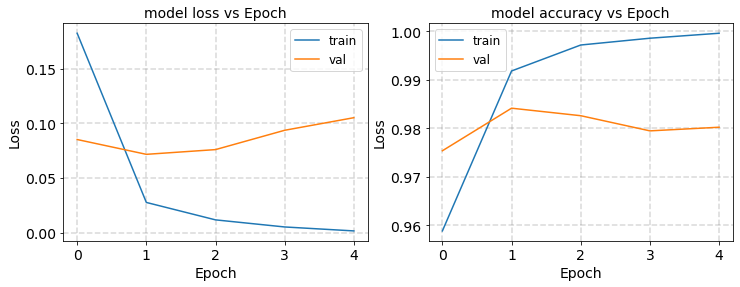

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1387 - accuracy: 0.9574 - val_loss: 0.0705 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 4s - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0703 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0.0707 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0799 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0892 - val_accuracy: 0.9810


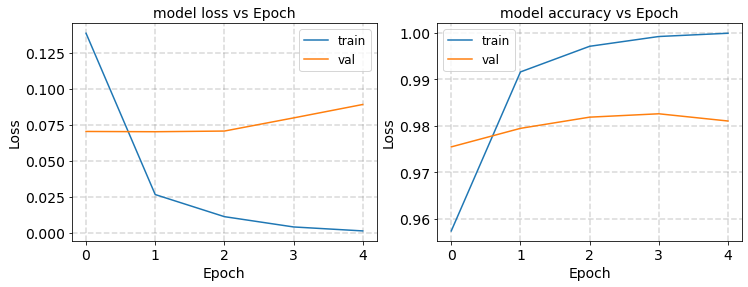

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1232 - accuracy: 0.9740 - val_loss: 0.0561 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0543 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0588 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 8.0163e-04 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 2.6203e-04 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9866


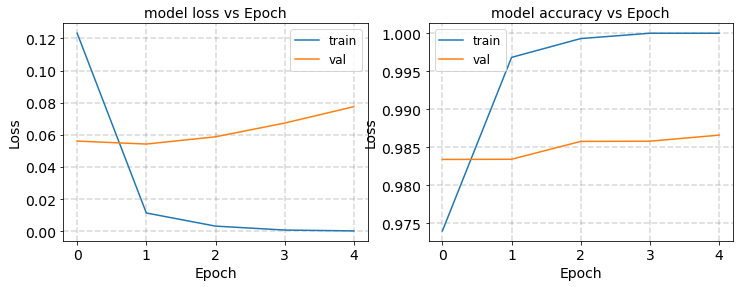

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 64)                8258      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

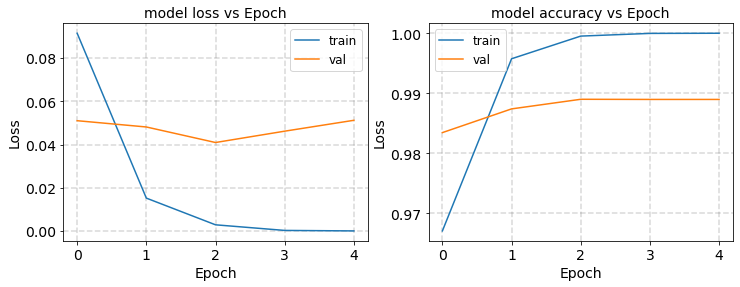

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1153 - accuracy: 0.9690 - val_loss: 0.0791 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 4s - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.0787 - val_accuracy: 0.9715
Epoch 3/5
1250/1250 - 4s - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0867 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.1013 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 3s - loss: 3.3551e-04 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9811


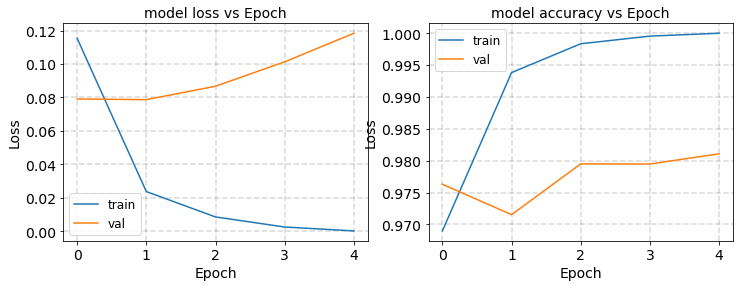

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0896 - accuracy: 0.9789 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0426 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0569 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0622 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 4s - loss: 1.7833e-04 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9890


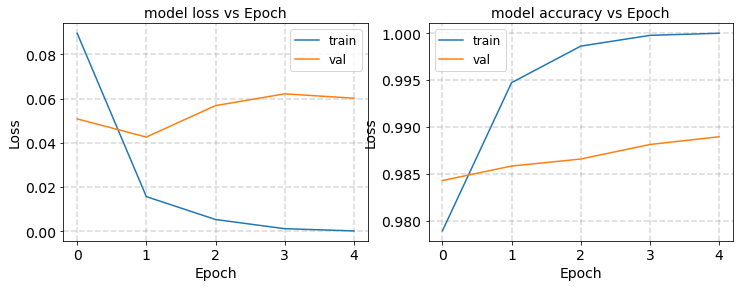

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1736 - accuracy: 0.9462 - val_loss: 0.0645 - val_accuracy: 0.9796
Epoch 2/5
1250/1250 - 5s - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0663 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0764 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 9.7812e-04 - accuracy: 0.9998 - val_loss: 0.0944 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 2.0618e-04 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9834


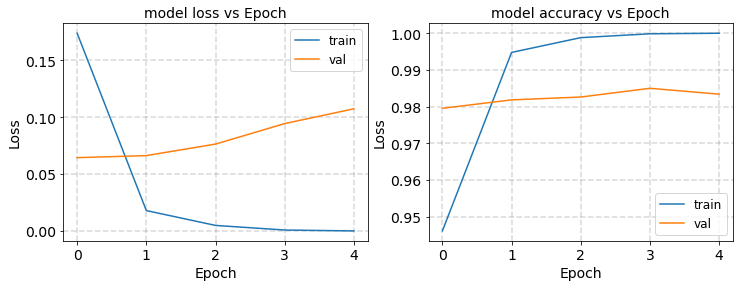

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 5.5096e-05 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 2.1549e-05 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 9.6109e-06 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 3.9885e-06 - accuracy: 1.0000 - val_loss: 0.1593 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.8021e-06 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9826


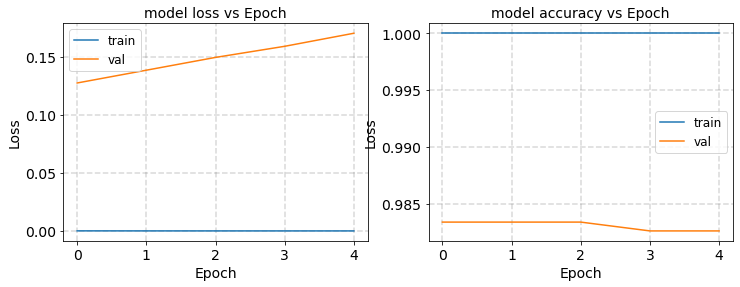

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1571 - accuracy: 0.9686 - val_loss: 0.0833 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 4s - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.1040 - val_accuracy: 0.9739
Epoch 3/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.1165 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1440 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 4s - loss: 4.7655e-04 - accuracy: 1.0000 - val_loss: 0.1598 - val_accuracy: 0.9779


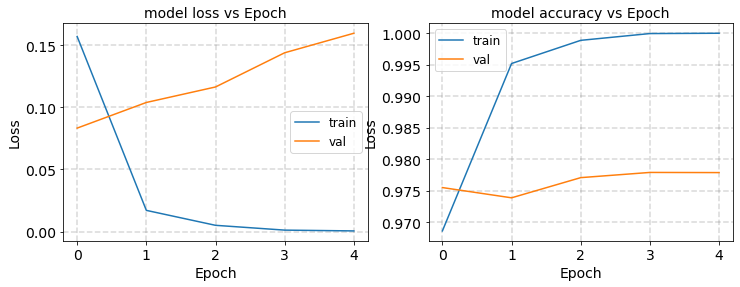

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0783 - accuracy: 0.9871 - val_loss: 0.0558 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0721 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 6.7571e-04 - accuracy: 0.9999 - val_loss: 0.0789 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 4s - loss: 1.9187e-04 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 4s - loss: 6.7562e-05 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9843


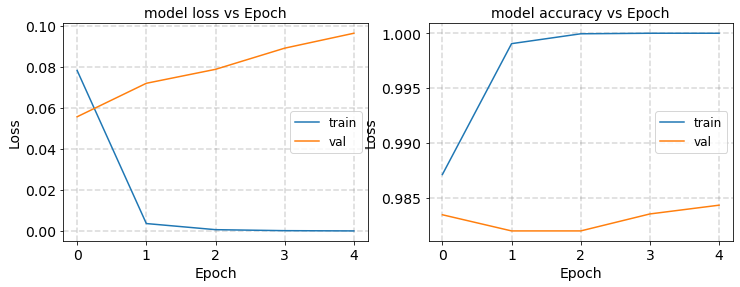

2
Epoch 1/5
1250/1250 - 5s - loss: 0.2274 - accuracy: 0.9575 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 5s - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.0469 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0687 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0583 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0609 - val_accuracy: 0.9865


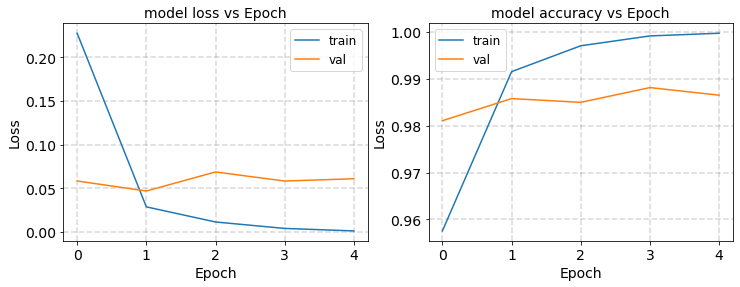

round2 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.1245 - accuracy: 0.9689 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 3s - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0925 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.1048 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1247 - val_accuracy: 0.9778
Epoch 5/5
1250/1250 - 3s - loss: 4.0545e-04 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9786


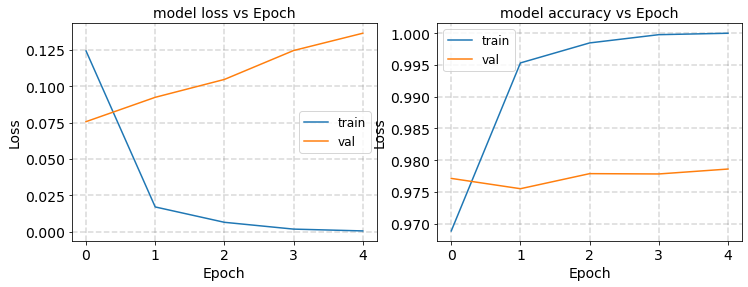

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1492 - accuracy: 0.9699 - val_loss: 0.0456 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.0555 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0601 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0616 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 4.8191e-04 - accuracy: 0.9999 - val_loss: 0.0687 - val_accuracy: 0.9897


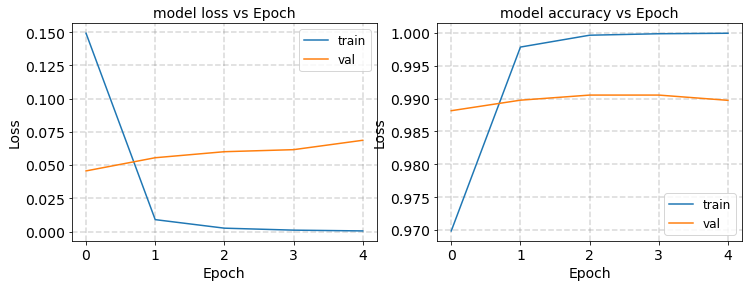

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1566 - accuracy: 0.9710 - val_loss: 0.0695 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0820 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 8.9619e-04 - accuracy: 0.9999 - val_loss: 0.0914 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 2.2105e-04 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 8.0984e-05 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9842


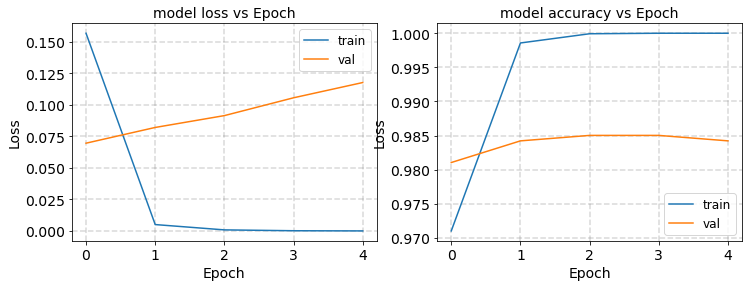

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1849 - accuracy: 0.9563 - val_loss: 0.1045 - val_accuracy: 0.9724
Epoch 2/5
1250/1250 - 3s - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.1026 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.1034 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 3s - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.1080 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1318 - val_accuracy: 0.9803


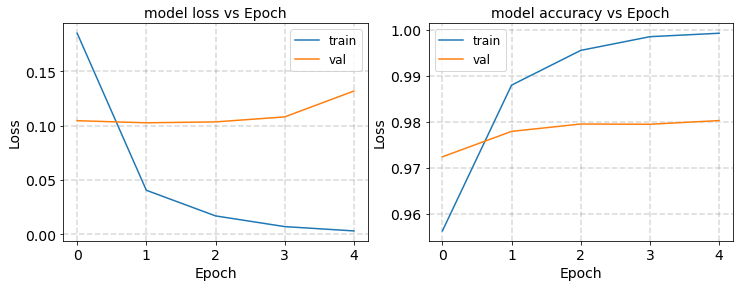

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 64)                8258      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 9
round0 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1435 - accuracy: 0.9446 - val_loss: 0.0611 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0536 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.0700 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0994 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 4.1178e-04 - accuracy: 0.9999 - val_loss: 0.0821 - val_accuracy: 0.9834


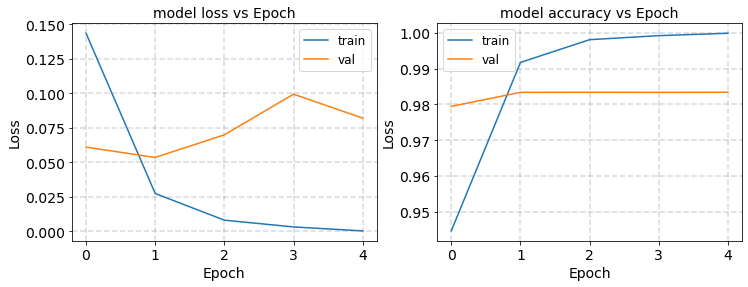

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1071 - accuracy: 0.9733 - val_loss: 0.0378 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0341 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 1.5572e-04 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9921


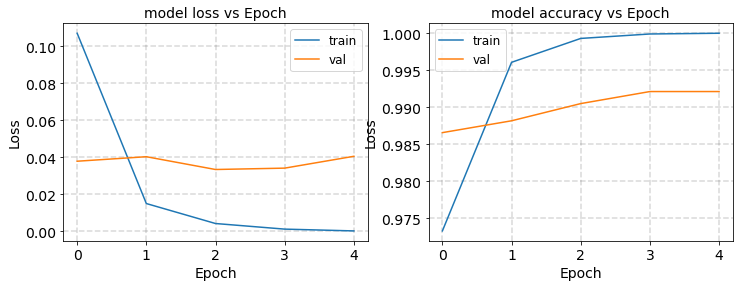

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0912 - accuracy: 0.9787 - val_loss: 0.0649 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0607 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0692 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 3.4875e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.1013e-04 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9898


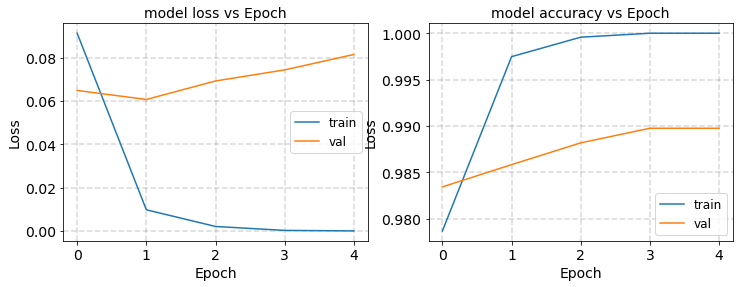

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1396 - accuracy: 0.9658 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 3s - loss: 0.0278 - accuracy: 0.9919 - val_loss: 0.0879 - val_accuracy: 0.9754
Epoch 3/5
1250/1250 - 3s - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.0865 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.1115 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 4s - loss: 7.8443e-04 - accuracy: 0.9999 - val_loss: 0.1083 - val_accuracy: 0.9802


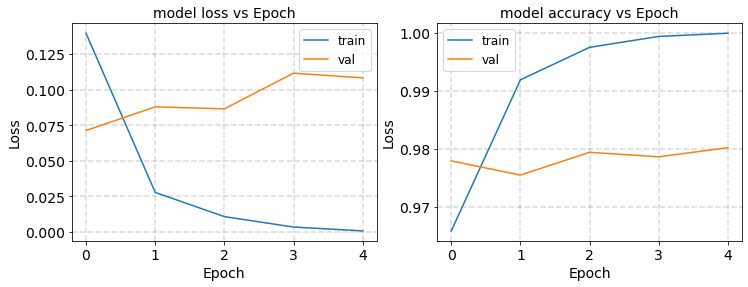

round1 [9 2 8 3]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0680 - accuracy: 0.9853 - val_loss: 0.0791 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0943 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.1160 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 2.7443e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 9.7443e-05 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9858


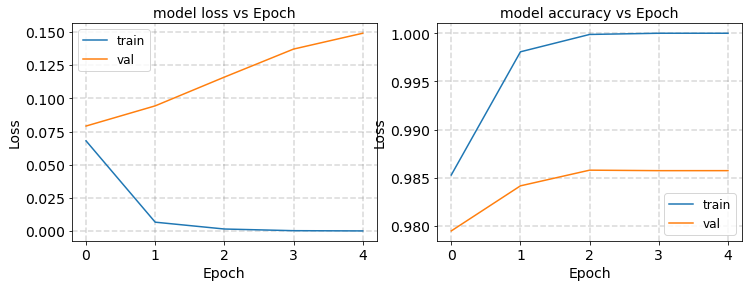

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1532 - accuracy: 0.9758 - val_loss: 0.0601 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 5s - loss: 0.0083 - accuracy: 0.9983 - val_loss: 0.0669 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0799 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 3.8432e-04 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 1.0311e-04 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9850


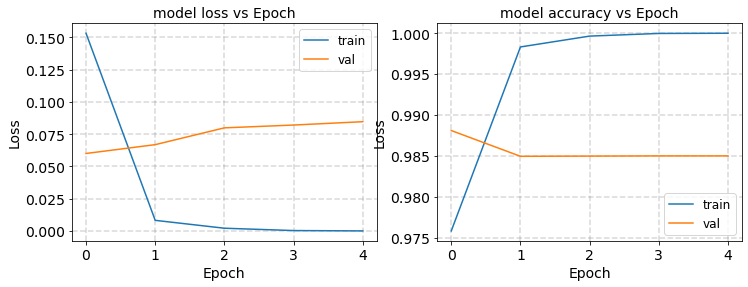

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1214 - accuracy: 0.9707 - val_loss: 0.1062 - val_accuracy: 0.9725
Epoch 2/5
1250/1250 - 4s - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.1190 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 4s - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.1524 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1773 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 5s - loss: 3.5398e-04 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9763


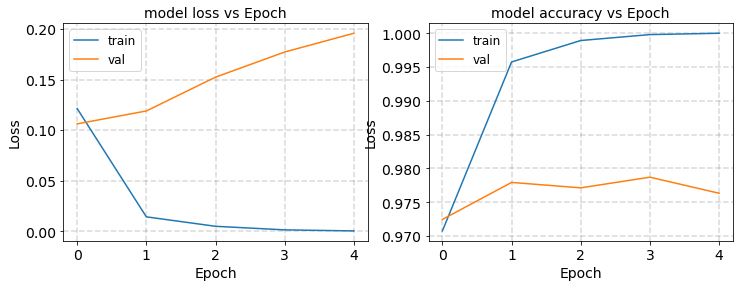

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1443 - accuracy: 0.9703 - val_loss: 0.0802 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 5s - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.1097 - val_accuracy: 0.9770
Epoch 3/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.1173 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 4s - loss: 9.2502e-04 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 4s - loss: 2.5330e-04 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9794


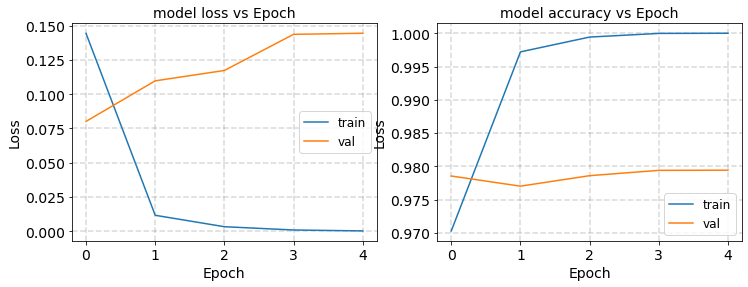

round2 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.1365 - accuracy: 0.9721 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0143 - accuracy: 0.9963 - val_loss: 0.0511 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0546 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0641 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 6.8300e-04 - accuracy: 0.9999 - val_loss: 0.0753 - val_accuracy: 0.9905


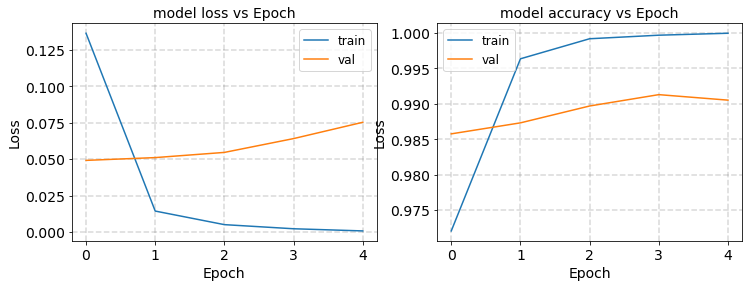

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1326 - accuracy: 0.9746 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 4s - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0911 - val_accuracy: 0.9762
Epoch 3/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1057 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1319 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 4s - loss: 5.8041e-04 - accuracy: 0.9998 - val_loss: 0.1368 - val_accuracy: 0.9818


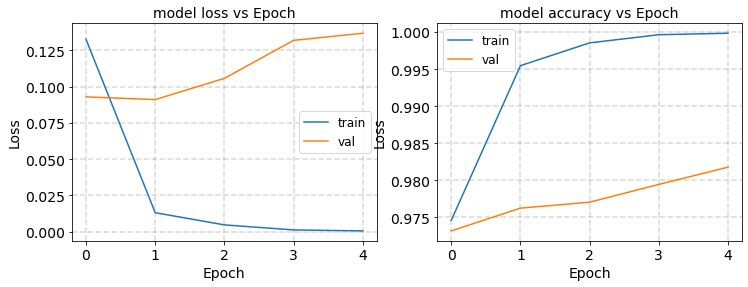

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1343 - accuracy: 0.9601 - val_loss: 0.0786 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 4s - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0914 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.1067 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1309 - val_accuracy: 0.9755
Epoch 5/5
1250/1250 - 4s - loss: 5.3364e-04 - accuracy: 0.9999 - val_loss: 0.1490 - val_accuracy: 0.9763


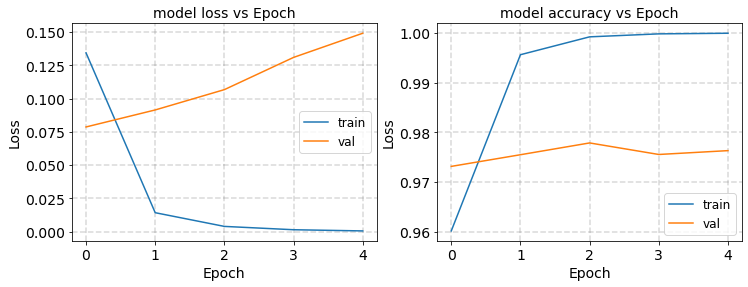

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1841 - accuracy: 0.9564 - val_loss: 0.0936 - val_accuracy: 0.9685
Epoch 2/5
1250/1250 - 4s - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.1055 - val_accuracy: 0.9724
Epoch 3/5
1250/1250 - 4s - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.1163 - val_accuracy: 0.9740
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1505 - val_accuracy: 0.9755
Epoch 5/5
1250/1250 - 3s - loss: 8.0309e-04 - accuracy: 0.9998 - val_loss: 0.1739 - val_accuracy: 0.9747


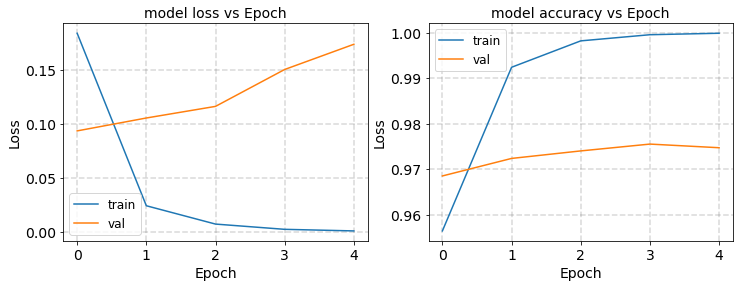

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 64)                8258      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_08_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_64_run0  1.55826         1.57496      0.0193993   
2389_seq_prune_08_4_64_run1  1.58235         1.58674      0.0337115   
2389_seq_prune_08_4_64_run2  1.53011         1.60217      0.0403184   
2389_seq_prune_08_4_64_run3  1.61417         1.62673      0.0330065   
2389_seq_prune_08_4_64_run4  1.54887         1.56841      0.0234253   
2389_seq_prune_08_4_64_run5  1.67625         1.64008      0.0398102   
2389_seq_prune_08_4_64_run6  1.65256         1.64209      0.0313771   
2389_seq_prune_08_4_64_run7  1.54311         1.60877      0.0416596   
2389_seq_prune_08_4_64_run8  1.50887         1.55975      0.0368398   
2389_seq_prune_08_4_64_run9  1.62864         1.62724      0.0348137   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_64_run0     0.00433782         10     0.2           No   
2389_seq_prune_08_4_64_run1     0.00753811         35     0.7           No   
2389_seq_prune_08_4_64_run2     0.00901546          5     0.1           No   
2389_seq_prune_08_4_64_run3     0.00738048         30     0.6           No   
2389_seq_prune_08_4_64_run4     0.00523806         25     0.5           No   
2389_seq_prune_08_4_64_run5     0.00890184         70     0.6           No   
2389_seq_prune_08_4_64_run6     0.00701613         70     0.6           No   
2389_seq_prune_08_4_64_run7     0.00931536          0       0          Yes   
2389_seq_prune_08_4_64_run8     0.00823763         10     0.2           No   
2389_seq_prune_08_4_64_run9     0.00778458         50       1           No   

                            Direction  Accuracy  
2389_seq_prune_08_4_64_run0   smaller  0.945325  
2389_seq_prune_08_4_64_run1   smaller   0.94005  
2389_seq_prune_08_4_64_run2   smaller   0.95185  
2389_seq_prune_08_4_64_run3   smaller   0.94235  
2389_seq_prune_08_4_64_run4   smaller  0.939925  
2389_seq_prune_08_4_64_run5    larger   0.91795  
2389_seq_prune_08_4_64_run6    larger    0.9067  
2389_seq_prune_08_4_64_run7   smaller  0.940075  
2389_seq_prune_08_4_64_run8   smaller    0.9147  
2389_seq_prune_08_4_64_run9    larger   0.95025

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_64_run0  1.55826         1.57496      0.0193993   
2389_seq_prune_08_4_64_run1  1.58235         1.58674      0.0337115   
2389_seq_prune_08_4_64_run2  1.53011         1.60217      0.0403184   
2389_seq_prune_08_4_64_run3  1.61417         1.62673      0.0330065   
2389_seq_prune_08_4_64_run4  1.54887         1.56841      0.0234253   
2389_seq_prune_08_4_64_run5  1.67625         1.64008      0.0398102   
2389_seq_prune_08_4_64_run6  1.65256         1.64209      0.0313771   
2389_seq_prune_08_4_64_run7  1.54311         1.60877      0.0416596   
2389_seq_prune_08_4_64_run8  1.50887         1.55975      0.0368398   
2389_seq_prune_08_4_64_run9  1.62864         1.62724      0.0348137   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_64_run0     0.00433782         10     0.2           No   
2389_seq_prune_08_4_64_run1     0.00753811         35     0.7           No   
2389_seq_prune_08_4_64_run2     0.00901546          5     0.1           No   
2389_seq_prune_08_4_64_run3     0.00738048         30     0.6           No   
2389_seq_prune_08_4_64_run4     0.00523806         25     0.5           No   
2389_seq_prune_08_4_64_run5     0.00890184         70     0.6           No   
2389_seq_prune_08_4_64_run6     0.00701613         70     0.6           No   
2389_seq_prune_08_4_64_run7     0.00931536          0       0          Yes   
2389_seq_prune_08_4_64_run8     0.00823763         10     0.2           No   
2389_seq_prune_08_4_64_run9     0.00778458         50       1           No   

                            Direction  Accuracy  
2389_seq_prune_08_4_64_run0   smaller  0.945325  
2389_seq_prune_08_4_64_run1   smaller   0.94005  
2389_seq_prune_08_4_64_run2   smaller   0.95185  
2389_seq_prune_08_4_64_run3   smaller   0.94235  
2389_seq_prune_08_4_64_run4   smaller  0.939925  
2389_seq_prune_08_4_64_run5    larger   0.91795  
2389_seq_prune_08_4_64_run6    larger    0.9067  
2389_seq_prune_08_4_64_run7   smaller  0.940075  
2389_seq_prune_08_4_64_run8   smaller    0.9147  
2389_seq_prune_08_4_64_run9    larger   0.95025

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.        , -0.        , -0.07291906, ...,  0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08111886],
       [-0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.07915264, -0.        , ..., -0.        ,
         0.        ,  0.        ],
       [ 0.07928132,  0.        ,  0.        , ...,  0.06890715,
         0.        ,  0.        ],
       [ 0.        , -0.        , -0.07466602, ..., -0.        ,
         0.        ,  0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.5582582653433548
1.574963292895766
0.019399303295904488
0.004337816088577815
10.0
0.2
No
smaller
0.9453250169754028
